In [0]:
#/***************************************************************************************
#*
#*    Title: The Examination of ML integrated with data balancing techniques in the application of student outcome prediction
#*    Author: Amjad Abdullah Almammar
#*    Supervised by
#*    Supervisor: Dr. Andrew McCarren
#*    Co-supervisor: Dr. Amal Alshardan
#* 
#***************************************************************************************/

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Pre-Processing

In [3]:
#import packages
import pandas as pd
import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from pylab import *
from scipy.stats import skew, kurtosis 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=LMNA-vBHPyHz
%load_ext google.colab.data_table

In [0]:
csv_assesment = pd.read_csv("/content/drive/My Drive/Capstone/CSV_files/assessments.csv");
csv_courses = pd.read_csv("/content/drive/My Drive/Capstone/CSV_files/courses.csv");
csv_studentAssesment = pd.read_csv("/content/drive/My Drive/Capstone/CSV_files/studentAssessment.csv");
csv_studentInfo = pd.read_csv("/content/drive/My Drive/Capstone/CSV_files/studentInfo.csv");
csv_studentRegistration = pd.read_csv("/content/drive/My Drive/Capstone/CSV_files/studentRegistration.csv");
csv_studentVle = pd.read_csv("/content/drive/My Drive/Capstone/CSV_files/studentVle.csv");
csv_vle = pd.read_csv("/content/drive/My Drive/Capstone/CSV_files/vle.csv");

In [6]:
csv_assesment.head(5)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


##### **Checking Nulls**

In [7]:
print("*****Total Number of Null values in the assesment*****")
print(csv_assesment.isna().sum())
print("*****Total Number of Null values in the courses*****")
print(csv_courses.isna().sum())
print("*****Total Number of Null values in the studentAssesment*****")
print(csv_studentAssesment.isna().sum())
print("*****Total Number of Null values in the studentInfo*****")
print(csv_studentInfo.isna().sum())
print("*****Total Number of Null values in the studentRegistration*****")
print(csv_studentRegistration.isna().sum())
print("*****Total Number of Null values in the studentVle*****")
print(csv_studentVle.isna().sum())
print("*****Total Number of Null values in the vle*****")
print(csv_vle.isna().sum())

*****Total Number of Null values in the assesment*****
code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64
*****Total Number of Null values in the courses*****
code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64
*****Total Number of Null values in the studentAssesment*****
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64
*****Total Number of Null values in the studentInfo*****
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64
*****Total Number of Nu

***** Number of Null values in the assesment**
date                :  11

***** Number of Null values in the courses**: No Nulls

***** Number of Null values in the studentAssesment**
score               : 173

***** Number of Null values in the studentInfo**
imd_band           :  1111

***** Number of Null values in the studentRegistration** :
date_registration :   45 , date_unregistration :  22521

***** Number of Null values in the studentVle**: No Nulls

***** Number of Null values in the vle**
 : week_from            : 5243 , week_to              : 5243


In [8]:
csv_assesment.info()
csv_courses.info()
csv_studentAssesment.info()
csv_studentInfo.info()
csv_studentRegistration.info()
csv_studentVle.info()
csv_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes
<class 'panda

**No strings, only objects, floats or ints**


##### **Chi-Square**

###### **Chi-Square of each categorical variable to Final result**

In [9]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(csv_studentInfo['gender'],csv_studentInfo['final_result']))[0:3]
# results will be shown as (chi-square value,  p-value , degrees of freedom)

(16.53014952372189, 0.0008827203938431326, 3)

P- value here is equal to 0.00088 (less than  0.05), which means that there is a relationship between 'gender'  and final result. 
** Degrees of freedom is 3

In [10]:
from scipy.stats import chi2_contingency
features = ['region', 'disability','highest_education', 'imd_band', 'gender', 'age_band', 'code_module','code_presentation']

for i in features:
  print(i, ': ', chi2_contingency(pd.crosstab(csv_studentInfo[i],csv_studentInfo['final_result']))[0:3])
  print("")

region :  (449.71513242734386, 6.470404440730822e-73, 36)

disability :  (138.45398732595984, 8.143196121271435e-30, 3)

highest_education :  (1024.6961991440007, 9.18211300726649e-212, 12)

imd_band :  (666.9351969185766, 3.150931444181126e-123, 27)

gender :  (16.53014952372189, 0.0008827203938431326, 3)

age_band :  (222.65079791604964, 2.83109146708854e-45, 6)

code_module :  (1443.193243950968, 7.589955448666229e-296, 18)

code_presentation :  (402.1617735717482, 4.7361046772105625e-81, 9)



In [11]:
chi2_contingency(pd.crosstab(csv_studentInfo['age_band'],csv_studentInfo['final_result']))[1].round(6)  ## p value to make sure that it is ~0


0.0

##### **Shrinking the size of VLE**

In [13]:
csv_studentVle.head(10)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
5,AAA,2013J,28400,546652,-10,8
6,AAA,2013J,28400,546876,-10,2
7,AAA,2013J,28400,546688,-10,15
8,AAA,2013J,28400,546662,-10,17
9,AAA,2013J,28400,546890,-10,1


If ID_students and ID_site  and Code module and Code Presentation && if same date --> THEN add the (sum_click) as TotalNumberOfClicksDay

In [14]:
#studentVle_shrinked = csv_studentVle.copy()
#studentVle_shrinked= csv_studentVle.groupby(['code_module','code_presentation', 'id_student', 'id_site', 'date'])['sum_click'].agg('sum')
studentVle_shrinked = csv_studentVle.groupby(['code_module','code_presentation', 'id_student', 'id_site', 'date'])['sum_click'].sum().reset_index()
studentVle_shrinked.head(5)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,11391,546614,-5,7
1,AAA,2013J,11391,546614,0,10
2,AAA,2013J,11391,546614,1,9
3,AAA,2013J,11391,546614,2,3
4,AAA,2013J,11391,546614,6,1


In [15]:
studentVle_shrinked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8459320 entries, 0 to 8459319
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 387.2+ MB


In [16]:
csv_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


from 10,655,280 to 8,459,319 

In [0]:
csv_StudentVleShrinked = studentVle_shrinked.to_csv("studentVleShrinked.csv", encoding='utf-8', index=False)

##### **Cleaning VLe file & Grouping VLE related files**


In [0]:
csv_vle = csv_vle.drop(['week_from','week_to'], axis=1)

In [0]:
# merge many-to-many 
studentsVleMerged = pd.merge(studentVle_shrinked, csv_vle, on=['id_site', 'code_module', 'code_presentation']) 

In [0]:
studentsVleMerged.to_csv("studentsVleMerged.csv", encoding='utf-8', index=False)

In [21]:
studentsVleMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8459320 entries, 0 to 8459319
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
 6   activity_type      object
dtypes: int64(4), object(3)
memory usage: 516.3+ MB


In [22]:
studentsVleMerged.head(10)

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,11391,546614,-5,7,homepage
1,AAA,2013J,11391,546614,0,10,homepage
2,AAA,2013J,11391,546614,1,9,homepage
3,AAA,2013J,11391,546614,2,3,homepage
4,AAA,2013J,11391,546614,6,1,homepage
5,AAA,2013J,11391,546614,9,1,homepage
6,AAA,2013J,11391,546614,17,3,homepage
7,AAA,2013J,11391,546614,18,8,homepage
8,AAA,2013J,11391,546614,29,5,homepage
9,AAA,2013J,11391,546614,30,3,homepage


 **Using final result column to clean data**




In [23]:
csv_studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [0]:
#merging the student inf and student registration files 
csv_studentInfoReg = pd.merge(csv_studentInfo, csv_studentRegistration, on=['id_student', 'code_module', 'code_presentation'])

In [0]:
csv_studentInfoReg.to_csv("csv_studentInfoReg.csv", encoding='utf-8', index=False)

In [0]:
# removing the withdrawn final results 
csv_studentInfoRegUpdated = csv_studentInfoReg[csv_studentInfoReg.final_result != 'Withdrawn']

In [27]:
# replacing Distinction by Pass
#csv_studentInfoRegUpdated = csv_studentInfoReg.copy()
csv_studentInfoRegUpdated['final_result'] = csv_studentInfoRegUpdated['final_result'].replace({'Distinction': 'Pass'}).copy()
csv_studentInfoRegUpdated

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,-110.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32587,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Pass,-23.0,NaN
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0,NaN
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Pass,-23.0,NaN
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,-129.0,NaN


In [0]:
# deleting rows of withdrawn students using their ids
#studentsVleMerged = studentsVleMerged[~studentsVleMerged['id_student'].isin(withdrawn_df)]

In [29]:
studentsVleMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8459320 entries, 0 to 8459319
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
 6   activity_type      object
dtypes: int64(4), object(3)
memory usage: 516.3+ MB


Number of records in studentsVleMerged dropped down to be 7,172,929 -from 8,459,319 

##### **Dealing with nulls**

In [30]:
# checking Nulls
csv_studentInfoRegUpdated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22437 entries, 0 to 32592
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           22437 non-null  object 
 1   code_presentation     22437 non-null  object 
 2   id_student            22437 non-null  int64  
 3   gender                22437 non-null  object 
 4   region                22437 non-null  object 
 5   highest_education     22437 non-null  object 
 6   imd_band              21562 non-null  object 
 7   age_band              22437 non-null  object 
 8   num_of_prev_attempts  22437 non-null  int64  
 9   studied_credits       22437 non-null  int64  
 10  disability            22437 non-null  object 
 11  final_result          22437 non-null  object 
 12  date_registration     22431 non-null  float64
 13  date_unregistration   9 non-null      float64
dtypes: float64(2), int64(3), object(9)
memory usage: 2.6+ MB


imd_band                **21562** non-null object

age_band                22437 non-null object

num_of_prev_attempts    22437 non-null int64

studied_credits         22437 non-null int64

disability              22437 non-null object

final_result            22437 non-null object

date_registration       **22431** non-null float64  --> **Dropped**

date_unregistration     **9** non-null float64       --> **Dropped**

In [0]:
#dropping data_unregistration; too many nulls
csv_studentInfoRegUpdated = csv_studentInfoRegUpdated.drop(['date_unregistration'], axis=1)

In [0]:
# date_registration 22431 non-null float64 
#Dropping Null records in date registration
csv_studentInfoRegUpdated = csv_studentInfoRegUpdated.dropna(subset=['date_registration'])
# --> Impute it with the most common value
#csv_studentInfoRegUpdated['date_registration'] = csv_studentInfoRegUpdated['date_registration'].fillna(csv_studentInfoRegUpdated['date_registration'].mode()[0])

In [33]:
csv_studentInfoRegUpdated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22431 entries, 0 to 32592
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           22431 non-null  object 
 1   code_presentation     22431 non-null  object 
 2   id_student            22431 non-null  int64  
 3   gender                22431 non-null  object 
 4   region                22431 non-null  object 
 5   highest_education     22431 non-null  object 
 6   imd_band              21556 non-null  object 
 7   age_band              22431 non-null  object 
 8   num_of_prev_attempts  22431 non-null  int64  
 9   studied_credits       22431 non-null  int64  
 10  disability            22431 non-null  object 
 11  final_result          22431 non-null  object 
 12  date_registration     22431 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.4+ MB


In [0]:
csv_studentInfoRegUpdated.to_csv("csv_studentInfoRegUpdated.csv", encoding='utf-8', index=False)

In [35]:
csv_studentInfoRegUpdated['imd_band'].unique()

array(['90-100%', '20-30%', '50-60%', '80-90%', '30-40%', '70-80%', nan,
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

It can be seen that there are 10 categories for the imd_band:

( 0-10%, 10-20%, 20-30%, 30-40%, 40-50%, 50-60%, 60-70%, 70-80%, 80-90%, 90-100% ). 

In addition, there are 875 records with Null value.

**-will have to deal with % sign and null values.**

In [36]:
csv_studentInfoRegUpdated['imd_band'] = csv_studentInfoRegUpdated['imd_band'].str.replace('\%','')
csv_studentInfoRegUpdated['imd_band'].unique()

array(['90-100', '20-30', '50-60', '80-90', '30-40', '70-80', nan,
       '60-70', '40-50', '10-20', '0-10'], dtype=object)

In [37]:
# dealing with <= sign
csv_studentInfoRegUpdated.loc[csv_studentInfoRegUpdated['age_band'] == '55<=', 'age_band'] = 'greaterOrEqual55' 
csv_studentInfoRegUpdated.loc[csv_studentInfoRegUpdated['age_band'] == '35-55', 'age_band'] = '35-55' 
csv_studentInfoRegUpdated.loc[csv_studentInfoRegUpdated['age_band'] == '0-35', 'age_band'] = '0-35' 
csv_studentInfoRegUpdated.head(10)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100,greaterOrEqual55,0,240,N,Pass,-159.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30,35-55,0,60,N,Pass,-53.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60,35-55,0,60,N,Pass,-52.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60,0-35,0,60,N,Pass,-176.0
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90,35-55,0,60,N,Pass,-110.0
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40,0-35,0,60,N,Pass,-67.0
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100,0-35,0,120,N,Pass,-29.0
8,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80,0-35,0,90,N,Pass,-33.0
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,greaterOrEqual55,0,60,N,Pass,-179.0
10,AAA,2013J,57506,M,South Region,Lower Than A Level,70-80,35-55,0,60,N,Pass,-103.0


In [0]:
#Dropping Null records in IMD_BAND
csv_studentInfoRegUpdated = csv_studentInfoRegUpdated.dropna(subset=['imd_band'])

In [39]:
csv_studentInfoRegUpdated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21556 entries, 0 to 32592
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           21556 non-null  object 
 1   code_presentation     21556 non-null  object 
 2   id_student            21556 non-null  int64  
 3   gender                21556 non-null  object 
 4   region                21556 non-null  object 
 5   highest_education     21556 non-null  object 
 6   imd_band              21556 non-null  object 
 7   age_band              21556 non-null  object 
 8   num_of_prev_attempts  21556 non-null  int64  
 9   studied_credits       21556 non-null  int64  
 10  disability            21556 non-null  object 
 11  final_result          21556 non-null  object 
 12  date_registration     21556 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.3+ MB


In [40]:
csv_studentInfoRegUpdatedSubset = csv_studentInfoRegUpdated[['code_module', 'code_presentation', 'id_student', 'final_result']]
csv_studentInfoRegUpdatedSubset

,code_module,code_presentation,id_student,final_result
0,AAA,2013J,11391,Pass
1,AAA,2013J,28400,Pass
3,AAA,2013J,31604,Pass
4,AAA,2013J,32885,Pass
5,AAA,2013J,38053,Pass
...,...,...,...,...
32587,GGG,2014J,2620947,Pass
32588,GGG,2014J,2640965,Fail
32589,GGG,2014J,2645731,Pass
32590,GGG,2014J,2648187,Pass


In [41]:
#merging the student inf and student registration files 
studentsVleMerged = pd.merge(studentsVleMerged, csv_studentInfoRegUpdatedSubset, on=['code_module', 'code_presentation', 'id_student'])
studentsVleMerged

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,final_result
0,AAA,2013J,11391,546614,-5,7,homepage,Pass
1,AAA,2013J,11391,546614,0,10,homepage,Pass
2,AAA,2013J,11391,546614,1,9,homepage,Pass
3,AAA,2013J,11391,546614,2,3,homepage,Pass
4,AAA,2013J,11391,546614,6,1,homepage,Pass
...,...,...,...,...,...,...,...,...
7225569,GGG,2014J,2640965,897150,19,1,subpage,Fail
7225570,GGG,2014J,2640965,897151,12,2,subpage,Fail
7225571,GGG,2014J,2640965,897151,17,2,subpage,Fail
7225572,GGG,2014J,2640965,897151,19,1,subpage,Fail


In [0]:
# removing the withdrawn final results 
#studentsVleMerged2 = studentsVleMerged2[studentsVleMerged2.final_result != 'Withdrawn']

In [43]:
studentsVleMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7225574 entries, 0 to 7225573
Data columns (total 8 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
 6   activity_type      object
 7   final_result       object
dtypes: int64(4), object(4)
memory usage: 496.1+ MB


### Feature Engineering

In [44]:
## Since some -really small number of - students (same id and code module but different code presentation or at least same id) took one more course, I have decided not to depend on the student id
## instead added a new unique id  
studentsVleMerged["id_uniq"] = studentsVleMerged.groupby(['code_module', 'code_presentation', 'id_student']).ngroup() + 1
studentsVleMerged

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,final_result,id_uniq
0,AAA,2013J,11391,546614,-5,7,homepage,Pass,1
1,AAA,2013J,11391,546614,0,10,homepage,Pass,1
2,AAA,2013J,11391,546614,1,9,homepage,Pass,1
3,AAA,2013J,11391,546614,2,3,homepage,Pass,1
4,AAA,2013J,11391,546614,6,1,homepage,Pass,1
...,...,...,...,...,...,...,...,...,...
7225569,GGG,2014J,2640965,897150,19,1,subpage,Fail,21186
7225570,GGG,2014J,2640965,897151,12,2,subpage,Fail,21186
7225571,GGG,2014J,2640965,897151,17,2,subpage,Fail,21186
7225572,GGG,2014J,2640965,897151,19,1,subpage,Fail,21186


In [0]:
#merging the student inf and student registration files 
#studentsVleMerged2 = studentsVleMerged.merge(csv_studentInfoRegUpdatedSubset, how='outer',on = ['code_module', 'code_presentation', 'id_student'], validate = "m:m")
#studentsVleMerged2

I wondered first where did some records go to but it can be seen using this type of merge shows that there are students with no VLE data. Hence I do not want these null records. 

In [46]:
studentsVleMerged.loc[(studentsVleMerged.id_uniq ==1)]

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,final_result,id_uniq
0,AAA,2013J,11391,546614,-5,7,homepage,Pass,1
1,AAA,2013J,11391,546614,0,10,homepage,Pass,1
2,AAA,2013J,11391,546614,1,9,homepage,Pass,1
3,AAA,2013J,11391,546614,2,3,homepage,Pass,1
4,AAA,2013J,11391,546614,6,1,homepage,Pass,1
...,...,...,...,...,...,...,...,...,...
162,AAA,2013J,11391,547009,1,1,resource,Pass,1
163,AAA,2013J,11391,547009,241,1,resource,Pass,1
164,AAA,2013J,11391,547013,1,2,resource,Pass,1
165,AAA,2013J,11391,547013,18,1,resource,Pass,1


#### Number of clicks for each activity type Before & After course starts

##### Before Course Starts

In [0]:
studentsVleMergedBeforeAfter = studentsVleMerged.copy()
# if student clicked on any activity type before course starts (where date is negative), then multiply that number of clicks by -1 
studentsVleMergedBeforeAfter['sum_click'] = np.where(studentsVleMergedBeforeAfter['date']<0,studentsVleMergedBeforeAfter['sum_click']*-1,studentsVleMergedBeforeAfter['sum_click'])


In [48]:
studentsVleMergedCodeInfo = studentsVleMerged[['code_module','code_presentation','id_student', 'id_uniq']]
studentsVleMergedCodeInfo

,code_module,code_presentation,id_student,id_uniq
0,AAA,2013J,11391,1
1,AAA,2013J,11391,1
2,AAA,2013J,11391,1
3,AAA,2013J,11391,1
4,AAA,2013J,11391,1
...,...,...,...,...
7225569,GGG,2014J,2640965,21186
7225570,GGG,2014J,2640965,21186
7225571,GGG,2014J,2640965,21186
7225572,GGG,2014J,2640965,21186


In [49]:
studentsVleMergedCodeInfo= studentsVleMergedCodeInfo.drop_duplicates(subset=['id_uniq'], keep='first')
studentsVleMergedCodeInfo

,code_module,code_presentation,id_student,id_uniq
0,AAA,2013J,11391,1
167,AAA,2013J,28400,2
524,AAA,2013J,31604,3
1070,AAA,2013J,32885,4
1381,AAA,2013J,38053,5
...,...,...,...,...
7225420,GGG,2014J,699628,21159
7225503,GGG,2014J,2052942,21172
7225549,GGG,2014J,2475886,21181
7225556,GGG,2014J,2640965,21186


In [50]:
## Feature :: Number of Clicks Before Course Starts using negative numbers
studentsVleMergedBeforeAfter = studentsVleMergedBeforeAfter.drop(['code_module','code_presentation','id_student'], axis=1)
studentsVleMergedBefore = studentsVleMergedBeforeAfter.groupby(['id_uniq', 'activity_type'])['sum_click'].agg([('beforeCourseStarts' , lambda x : x[x < 0].sum())])
studentsVleMergedBefore

beforeCourseStarts
id_uniq activity_type                    
1       forumng                        -2
        homepage                       -7
        oucontent                     -78
        resource                        0
        subpage                       -11
...                                   ...
21189   homepage                      -40
        oucontent                      -5
        quiz                           -1
        resource                       -8
        subpage                        -8

[182069 rows x 1 columns]

In [51]:
## removing negative sign
studentsVleMergedBefore['beforeCourseStarts'] = studentsVleMergedBefore['beforeCourseStarts'].abs()
studentsVleMergedBefore.head(2)

beforeCourseStarts
id_uniq activity_type                    
1       forumng                         2
        homepage                        7

In [52]:
studentsVleMergedBefore = studentsVleMergedBefore.reset_index()
studentsVleMergedBefore

,id_uniq,activity_type,beforeCourseStarts
0,1,forumng,2
1,1,homepage,7
2,1,oucontent,78
3,1,resource,0
4,1,subpage,11
...,...,...,...
182064,21189,homepage,40
182065,21189,oucontent,5
182066,21189,quiz,1
182067,21189,resource,8


###### Possible Outliers? 

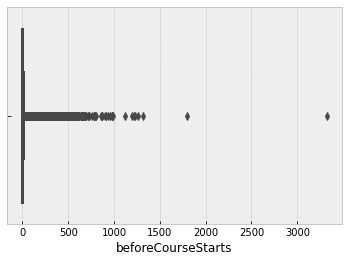

In [53]:
# Checking Outliers
sns.boxplot(studentsVleMergedBefore['beforeCourseStarts'])

In [54]:
studentsVleMergedBefore['beforeCourseStarts'].describe()

count    182069.000000
mean          9.096683
std          31.197037
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max        3322.000000
Name: beforeCourseStarts, dtype: float64

In [55]:
studentsVleMergedBefore.loc[ studentsVleMergedBefore['beforeCourseStarts'] > 1500 ]

,id_uniq,activity_type,beforeCourseStarts
58301,7876,quiz,3322
148297,17256,resource,1794


In [56]:
studentsVleMergedBefore.loc[ studentsVleMergedBefore['beforeCourseStarts'] > 1000 ]
## records of student with unique id == 7876 will be dropped later since it does not seem reaosnable. 

,id_uniq,activity_type,beforeCourseStarts
8620,1237,forumng,1232
10885,1551,forumng,1115
11896,1691,forumng,1215
55963,7574,quiz,1197
58301,7876,quiz,3322
123658,15100,forumng,1320
123659,15100,homepage,1258
148297,17256,resource,1794


###### Fixing Columns

In [57]:
## converting column values (activity type) to different columns and filling them with data from 'beforeCourseStarts'
studentsVleMergedBeforePivoted = studentsVleMergedBefore.pivot(index='id_uniq', columns='activity_type', values='beforeCourseStarts')\
            .reset_index()
studentsVleMergedBeforePivoted.columns.name=None
print(studentsVleMergedBeforePivoted)

       id_uniq  dataplus  dualpane  ...  sharedsubpage  subpage  url
0            1       NaN       NaN  ...            NaN     11.0  0.0
1            2       0.0       NaN  ...            NaN     23.0  7.0
2            3       0.0       NaN  ...            NaN     19.0  3.0
3            4       NaN       NaN  ...            NaN     17.0  3.0
4            5       0.0       NaN  ...            NaN     15.0  1.0
...        ...       ...       ...  ...            ...      ...  ...
21184    21185       NaN       NaN  ...            NaN      1.0  NaN
21185    21186       NaN       NaN  ...            NaN      0.0  NaN
21186    21187       NaN       NaN  ...            NaN      0.0  NaN
21187    21188       NaN       NaN  ...            NaN      3.0  NaN
21188    21189       NaN       NaN  ...            NaN      8.0  NaN

[21189 rows x 21 columns]


In [58]:
## filling nulls with zero
studentsVleMergedBeforePivoted = studentsVleMergedBeforePivoted.fillna(0)
studentsVleMergedBeforePivoted

,id_uniq,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,1,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0
1,2,0.0,0.0,0.0,0.0,73.0,0.0,46.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,23.0,7.0
2,3,0.0,0.0,0.0,0.0,29.0,1.0,30.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,19.0,3.0
3,4,0.0,0.0,0.0,0.0,73.0,2.0,52.0,0.0,0.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,17.0,3.0
4,5,0.0,0.0,0.0,0.0,122.0,0.0,55.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,21185,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21185,21186,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21186,21187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21187,21188,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,3.0,0.0


In [59]:
## adding a prefix to the new columns to distinguish them from other columns (after group)
studentsVleMergedBeforePivoted.columns = [col+'_before' if col != 'id_uniq'  else col for col in studentsVleMergedBeforePivoted.columns]
studentsVleMergedBeforePivoted

,id_uniq,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,subpage_before,url_before
0,1,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0
1,2,0.0,0.0,0.0,0.0,73.0,0.0,46.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,23.0,7.0
2,3,0.0,0.0,0.0,0.0,29.0,1.0,30.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,19.0,3.0
3,4,0.0,0.0,0.0,0.0,73.0,2.0,52.0,0.0,0.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,17.0,3.0
4,5,0.0,0.0,0.0,0.0,122.0,0.0,55.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,21185,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21185,21186,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21186,21187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21187,21188,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,3.0,0.0


##### After Course Starts

In [60]:
## what about day 0?? it should be on the after course starts .. ADD IT
studentsVleMergedAfter = studentsVleMergedBeforeAfter.groupby(['id_uniq', 'activity_type'])['sum_click'].agg([('afterCourseStarts' , lambda x : x[x >= 0].sum())])
studentsVleMergedAfter

afterCourseStarts
id_uniq activity_type                   
1       forumng                      191
        homepage                     131
        oucontent                    475
        resource                      13
        subpage                       21
...                                  ...
21189   homepage                      80
        oucontent                    260
        quiz                          59
        resource                      25
        subpage                       19

[182069 rows x 1 columns]

In [61]:
studentsVleMergedAfter = studentsVleMergedAfter.reset_index()
studentsVleMergedAfter

,id_uniq,activity_type,afterCourseStarts
0,1,forumng,191
1,1,homepage,131
2,1,oucontent,475
3,1,resource,13
4,1,subpage,21
...,...,...,...
182064,21189,homepage,80
182065,21189,oucontent,260
182066,21189,quiz,59
182067,21189,resource,25


###### Possible Outliers?

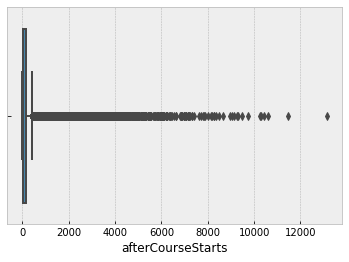

In [62]:
# Checking Outliers
sns.boxplot(studentsVleMergedAfter['afterCourseStarts'])

In [63]:
studentsVleMergedAfter['afterCourseStarts'].describe()

count    182069.000000
mean        179.388929
std         412.454638
min           0.000000
25%           9.000000
50%          40.000000
75%         163.000000
max       13136.000000
Name: afterCourseStarts, dtype: float64

In [64]:
studentsVleMergedAfter.loc[studentsVleMergedAfter['afterCourseStarts'] > 10000]
## records of student (id_uniq 2811) will be dropped since it does not seem reasonable

,id_uniq,activity_type,afterCourseStarts
7108,1017,forumng,10406
8939,1279,forumng,11464
11178,1592,forumng,10260
19983,2811,forumng,13136
55855,7560,quiz,10282
59360,8014,quiz,10579


###### Fixing columns

In [65]:
studentsVleMergedAfterPivoted = studentsVleMergedAfter.pivot(index='id_uniq', columns='activity_type', values='afterCourseStarts')\
            .reset_index()
studentsVleMergedAfterPivoted.columns.name=None
print(studentsVleMergedAfterPivoted)

       id_uniq  dataplus  dualpane  ...  sharedsubpage  subpage   url
0            1       NaN       NaN  ...            NaN     21.0   5.0
1            2      10.0       NaN  ...            NaN     64.0  41.0
2            3       2.0       NaN  ...            NaN    125.0  87.0
3            4       NaN       NaN  ...            NaN     62.0  11.0
4            5       7.0       NaN  ...            NaN     76.0  44.0
...        ...       ...       ...  ...            ...      ...   ...
21184    21185       NaN       NaN  ...            NaN     19.0   NaN
21185    21186       NaN       NaN  ...            NaN      9.0   NaN
21186    21187       NaN       NaN  ...            NaN     47.0   NaN
21187    21188       NaN       NaN  ...            NaN     17.0   NaN
21188    21189       NaN       NaN  ...            NaN     19.0   NaN

[21189 rows x 21 columns]


In [66]:
studentsVleMergedAfterPivoted = studentsVleMergedAfterPivoted.fillna(0)
studentsVleMergedAfterPivoted

,id_uniq,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,1,0.0,0.0,0.0,0.0,191.0,0.0,131.0,0.0,0.0,475.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,21.0,5.0
1,2,10.0,0.0,0.0,0.0,344.0,0.0,278.0,0.0,0.0,476.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,64.0,41.0
2,3,2.0,0.0,0.0,0.0,605.0,0.0,402.0,0.0,0.0,758.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,125.0,87.0
3,4,0.0,0.0,0.0,0.0,121.0,2.0,152.0,0.0,0.0,353.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,62.0,11.0
4,5,7.0,0.0,0.0,0.0,753.0,4.0,457.0,0.0,0.0,822.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,76.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,21185,0.0,0.0,0.0,0.0,18.0,4.0,86.0,0.0,0.0,203.0,0.0,0.0,0.0,0.0,116.0,0.0,23.0,0.0,19.0,0.0
21185,21186,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,9.0,0.0
21186,21187,0.0,0.0,0.0,0.0,65.0,5.0,167.0,0.0,0.0,348.0,0.0,0.0,0.0,0.0,152.0,0.0,109.0,0.0,47.0,0.0
21187,21188,0.0,0.0,0.0,0.0,0.0,1.0,57.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,129.0,0.0,15.0,0.0,17.0,0.0


In [67]:
studentsVleMergedAfterPivoted.columns = [col+'_after' if col != 'id_uniq'  else col for col in studentsVleMergedAfterPivoted.columns]
studentsVleMergedAfterPivoted

,id_uniq,dataplus_after,dualpane_after,externalquiz_after,folder_after,forumng_after,glossary_after,homepage_after,htmlactivity_after,oucollaborate_after,oucontent_after,ouelluminate_after,ouwiki_after,page_after,questionnaire_after,quiz_after,repeatactivity_after,resource_after,sharedsubpage_after,subpage_after,url_after
0,1,0.0,0.0,0.0,0.0,191.0,0.0,131.0,0.0,0.0,475.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,21.0,5.0
1,2,10.0,0.0,0.0,0.0,344.0,0.0,278.0,0.0,0.0,476.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,64.0,41.0
2,3,2.0,0.0,0.0,0.0,605.0,0.0,402.0,0.0,0.0,758.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,125.0,87.0
3,4,0.0,0.0,0.0,0.0,121.0,2.0,152.0,0.0,0.0,353.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,62.0,11.0
4,5,7.0,0.0,0.0,0.0,753.0,4.0,457.0,0.0,0.0,822.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,76.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,21185,0.0,0.0,0.0,0.0,18.0,4.0,86.0,0.0,0.0,203.0,0.0,0.0,0.0,0.0,116.0,0.0,23.0,0.0,19.0,0.0
21185,21186,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,9.0,0.0
21186,21187,0.0,0.0,0.0,0.0,65.0,5.0,167.0,0.0,0.0,348.0,0.0,0.0,0.0,0.0,152.0,0.0,109.0,0.0,47.0,0.0
21187,21188,0.0,0.0,0.0,0.0,0.0,1.0,57.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,129.0,0.0,15.0,0.0,17.0,0.0


In [68]:
studentsVleMergedBeforeAfterPivoted = pd.merge(studentsVleMergedBeforePivoted, studentsVleMergedAfterPivoted)
studentsVleMergedBeforeAfterPivoted

,id_uniq,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,subpage_before,url_before,dataplus_after,dualpane_after,externalquiz_after,folder_after,forumng_after,glossary_after,homepage_after,htmlactivity_after,oucollaborate_after,oucontent_after,ouelluminate_after,ouwiki_after,page_after,questionnaire_after,quiz_after,repeatactivity_after,resource_after,sharedsubpage_after,subpage_after,url_after
0,1,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,191.0,0.0,131.0,0.0,0.0,475.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,21.0,5.0
1,2,0.0,0.0,0.0,0.0,73.0,0.0,46.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,23.0,7.0,10.0,0.0,0.0,0.0,344.0,0.0,278.0,0.0,0.0,476.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,64.0,41.0
2,3,0.0,0.0,0.0,0.0,29.0,1.0,30.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,19.0,3.0,2.0,0.0,0.0,0.0,605.0,0.0,402.0,0.0,0.0,758.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,125.0,87.0
3,4,0.0,0.0,0.0,0.0,73.0,2.0,52.0,0.0,0.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,17.0,3.0,0.0,0.0,0.0,0.0,121.0,2.0,152.0,0.0,0.0,353.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,62.0,11.0
4,5,0.0,0.0,0.0,0.0,122.0,0.0,55.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,15.0,1.0,7.0,0.0,0.0,0.0,753.0,4.0,457.0,0.0,0.0,822.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,76.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,21185,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.0,4.0,86.0,0.0,0.0,203.0,0.0,0.0,0.0,0.0,116.0,0.0,23.0,0.0,19.0,0.0
21185,21186,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,9.0,0.0
21186,21187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,5.0,167.0,0.0,0.0,348.0,0.0,0.0,0.0,0.0,152.0,0.0,109.0,0.0,47.0,0.0
21187,21188,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,57.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,129.0,0.0,15.0,0.0,17.0,0.0


#### Total Number of clicks for each student

In [69]:

studentsVleMergedTotalNumClicks = studentsVleMerged.groupby(['code_module','code_presentation', 'id_student','id_uniq'])['sum_click'].agg('sum')
studentsVleMergedTotalNumClicks

code_module  code_presentation  id_student  id_uniq
AAA          2013J              11391       1           934
                                28400       2          1435
                                31604       3          2158
                                32885       4          1034
                                38053       5          2445
                                                       ... 
GGG          2014J              2620947     21185       476
                                2640965     21186        41
                                2645731     21187       893
                                2648187     21188       312
                                2684003     21189       616
Name: sum_click, Length: 21189, dtype: int64

In [70]:
studentsVleMergedTotalNumClicks = studentsVleMergedTotalNumClicks.reset_index()
studentsVleMergedTotalNumClicks

,code_module,code_presentation,id_student,id_uniq,sum_click
0,AAA,2013J,11391,1,934
1,AAA,2013J,28400,2,1435
2,AAA,2013J,31604,3,2158
3,AAA,2013J,32885,4,1034
4,AAA,2013J,38053,5,2445
...,...,...,...,...,...
21184,GGG,2014J,2620947,21185,476
21185,GGG,2014J,2640965,21186,41
21186,GGG,2014J,2645731,21187,893
21187,GGG,2014J,2648187,21188,312


In [0]:
studentsVleMergedTotalNumClicks.to_csv("studentsVleMergedTotalNumClicks.csv", encoding='utf-8', index=False)

In [72]:
len(set(studentsVleMerged['id_student']))

19964

In [73]:
len(set(studentsVleMergedTotalNumClicks['id_student']))

19964

In [74]:
len(studentsVleMergedTotalNumClicks)

21189

In [75]:
boolean = studentsVleMergedTotalNumClicks['id_uniq'].duplicated().any() # True if there are duplicate stduent ids 
boolean

False

#### Skewness & Kurtosis

In [76]:
studentsVleMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7225574 entries, 0 to 7225573
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
 6   activity_type      object
 7   final_result       object
 8   id_uniq            int64 
dtypes: int64(5), object(4)
memory usage: 551.3+ MB


In [0]:
studentsVleMergedSkew = studentsVleMerged.copy()
studentsVleMergedSkew= studentsVleMergedSkew.drop(['id_site','activity_type','code_module','code_presentation','id_student'], axis=1)

In [78]:
studentsVleMergedSkew = studentsVleMergedSkew.groupby(['id_uniq', 'date'])['sum_click'].sum().reset_index()
studentsVleMergedSkew


,id_uniq,date,sum_click
0,1,-5,98
1,1,0,49
2,1,1,127
3,1,2,4
4,1,6,3
...,...,...,...
1552617,21189,156,11
1552618,21189,171,31
1552619,21189,194,1
1552620,21189,205,45


In [79]:
studentsVleMergedSkew.dtypes

id_uniq      int64
date         int64
sum_click    int64
dtype: object

In [80]:
studentsVleMergedTEST = studentsVleMergedSkew.copy()
studentsVleMergedTEST
##arraySumClicks = np.array(studentsVleMergedTEST[['date','sum_click']])

,id_uniq,date,sum_click
0,1,-5,98
1,1,0,49
2,1,1,127
3,1,2,4
4,1,6,3
...,...,...,...
1552617,21189,156,11
1552618,21189,171,31
1552619,21189,194,1
1552620,21189,205,45


##### Example of one student

In [81]:
## Example of one student
student11 = np.array(studentsVleMergedTEST.loc[(studentsVleMergedTEST.id_uniq == 1)][['date','sum_click']])
student11

array([[ -5,  98],
       [  0,  49],
       [  1, 127],
       [  2,   4],
       [  6,   3],
       [  9,  20],
       [ 17,  51],
       [ 18,  49],
       [ 29,  18],
       [ 30,   5],
       [ 31,   3],
       [ 37,  52],
       [ 40,   8],
       [ 47,  15],
       [ 48,   7],
       [ 50,  18],
       [ 53,   1],
       [ 54,   1],
       [ 65,  16],
       [ 74,   9],
       [ 82,  12],
       [ 83,  19],
       [ 87,   2],
       [ 96,   5],
       [104,  27],
       [107,   9],
       [121,  27],
       [126,  13],
       [129,  42],
       [153,   1],
       [159,   2],
       [182,  29],
       [193,   6],
       [210,  43],
       [222,  35],
       [231,  15],
       [241,   7],
       [242,  78],
       [245,   7],
       [253,   1]], dtype=int64)

In [82]:
student11.dtype

dtype('int64')

In [0]:
date, sum_clicks = zip(*student11)

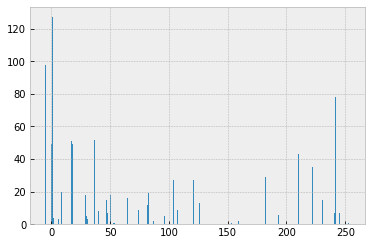

In [84]:
bar(date,sum_clicks,align='center')
show() 


Skewness for data (Scipy) :  2.0733949582843647

Kurtosis for data (Scipy):  4.763887048027106


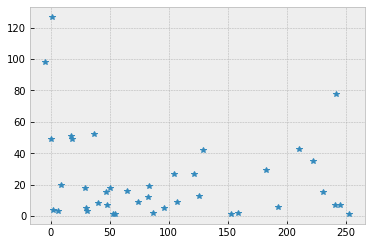

In [85]:

plot(date, sum_clicks, '*') 
print( '\nSkewness for data (Scipy) : ', skew(sum_clicks, bias=False))
print( '\nKurtosis for data (Scipy): ', kurtosis(sum_clicks, bias=False))
## correcting for bias 

Text(0, 0.5, 'number of clicks')

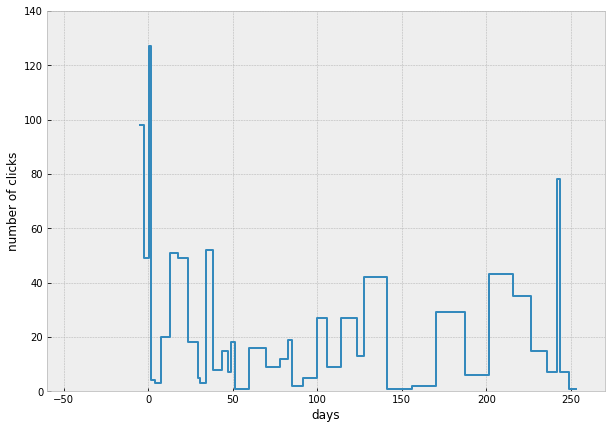

In [86]:
plt.figure(figsize=(10,7))
plt.ylim(0,140)
plt.xlim(-60,270)
plt.plot(date, sum_clicks, drawstyle='steps-mid')
plt.xlabel('days')
plt.ylabel('number of clicks')

Kurtosis is 4 approx which means that the tails are fatter 

In addition, the Skewness is greater than +1 which means that the data is highly skewed. 

##### Adding Inactive days (filling their values with 0's)

In [87]:
# making a list of student IDs
studentIDs = studentsVleMergedTotalNumClicks['id_uniq']
studentIDs

0            1
1            2
2            3
3            4
4            5
         ...  
21184    21185
21185    21186
21186    21187
21187    21188
21188    21189
Name: id_uniq, Length: 21189, dtype: int64

In [0]:
## create a 2d numpy array for each student (Data, Number of Clicks) as a dictionary
arr ={}
for idd  in studentIDs:
    arr[idd] = np.array(studentsVleMergedTEST.loc[studentsVleMergedTEST.id_uniq == idd][['date','sum_click']])

In [89]:
#dayCounterInActiveAfter = []
#dayCounterInActiveBefore = []
dayCounter = []
ids = 0
for idt in studentIDs:
    ids +=1
    #print(idt)
    numActiveBeforeCourseStarts = 0
    numInactiveAfterCourseStarts = 0
    numActiveAfterCourseStarts =0
    date, sum_clicks = zip(*arr[idt])
    #created a new list that starts from 0 till the max number in the date list, so we can loop through it 
    max_date = max(date) 
    min_date = min(date)
    date_list = range(min_date, max_date+1)
    #print(min_date, '  :   ', max_date)
    i = 0 
    su = 0 ## for iterating through sum_clicks
    for datee in date:
        if(datee == date_list[i]):
          ##do nothing since the number is already in the list 
          #print( idt, ' : ' , datee ,'  :   ', sum_clicks[su])
          dayCounter.append({'id_uniq': idt, 'date':  datee , 'sum_click':sum_clicks[su]})  
          i +=1 
          su+=1
        elif (datee > date_list[i]):  # if for example the student clicked on day 1 and then day 5 so 1 and 5 are only in the (datee) list,  then it will compare 5 > 2 
            #print('outside the list' + str(datee)+ " list"+ str(date_list[i]))
            while (datee > date_list[i]  ):  # or if (i<datee)
              #print( idt, ' : ' , date_list[i] ,'  :   ', 0)
              dayCounter.append({'id_uniq': idt, 'date':  date_list[i] , 'sum_click':0})  
              # as long as we are here 5 > 2, the values will be used 5 > 3, 5> 4, and finally when 5 is not greater than 5 it will go outside the while loop to the last if 
              # dayCounter add the date's numbers that are not in the list and add 0 since the student did not click on that day
             # if (date_list[i] < 0):
              #   dayCounterInActiveBefore.append({'id_uniq': idt, 'date':  date_list[i] , 'sum_click':0})
              #elif (date_list[i] >= 0):
               #  dayCounterInActiveAfter.append({'id_uniq': idt, 'date':  date_list[i] , 'sum_click':0})  
              i +=1
            ## next if is outside the while loop   
            if (datee == date_list[i]  ): 
              #print( idt, ' : ' , datee ,'  :   ' , )
              dayCounter.append({'id_uniq': idt, 'date': datee, 'sum_click':sum_clicks[su]})  
              i +=1
              su +=1

print(ids)
#dayCounterInActiveBefore = pd.DataFrame(dayCounterInActiveBefore)
#dayCounterInActiveAfter = pd.DataFrame(dayCounterInActiveAfter)
dayCounter = pd.DataFrame(dayCounter)
dayCounter

21189


,id_uniq,date,sum_click
0,1,-5,98
1,1,-4,0
2,1,-3,0
3,1,-2,0
4,1,-1,0
...,...,...,...
4670117,21189,215,0
4670118,21189,216,0
4670119,21189,217,0
4670120,21189,218,0


In [90]:
dayCounter.head(10)

,id_uniq,date,sum_click
0,1,-5,98
1,1,-4,0
2,1,-3,0
3,1,-2,0
4,1,-1,0
5,1,0,49
6,1,1,127
7,1,2,4
8,1,3,0
9,1,4,0


In [91]:
dayCounterCopy1 = dayCounter.copy()
dayCounterCopy1 = dayCounterCopy1[dayCounterCopy1.date < 0]
dayCounterCopy1.head(10)

,id_uniq,date,sum_click
0,1,-5,98
1,1,-4,0
2,1,-3,0
3,1,-2,0
4,1,-1,0
259,2,-10,70
260,2,-9,0
261,2,-8,9
262,2,-7,81
263,2,-6,13


In [92]:
dayCounterCopy = dayCounter.copy()
dayCounterCopy = dayCounterCopy[dayCounterCopy.date >= 0]
dayCounterCopy.head(10)

,id_uniq,date,sum_click
5,1,0,49
6,1,1,127
7,1,2,4
8,1,3,0
9,1,4,0
10,1,5,0
11,1,6,3
12,1,7,0
13,1,8,0
14,1,9,20


In [93]:
cc1 =  dayCounterCopy[['id_uniq']].drop_duplicates()
cc2 =  dayCounterCopy1[['id_uniq']].drop_duplicates()
df_diff = pd.concat([cc1, cc2]).drop_duplicates(keep=False)
df_diff = df_diff['id_uniq']
cc2[cc2.id_uniq.isin(df_diff)]
## list of uniq ids for students who only interacted with the vle Before the course starts 

,id_uniq
186126,753
207191,862
244885,1050
272810,1203
302543,1353
...,...
4510055,20416
4528126,20509
4583931,20779
4615974,20924


##### Example of the same student (after adding the inactive days) 

In [94]:
## Example of one student
student12 = np.array(dayCounter.loc[(dayCounter.id_uniq == 1)][['date','sum_click']])
student12

array([[ -5,  98],
       [ -4,   0],
       [ -3,   0],
       [ -2,   0],
       [ -1,   0],
       [  0,  49],
       [  1, 127],
       [  2,   4],
       [  3,   0],
       [  4,   0],
       [  5,   0],
       [  6,   3],
       [  7,   0],
       [  8,   0],
       [  9,  20],
       [ 10,   0],
       [ 11,   0],
       [ 12,   0],
       [ 13,   0],
       [ 14,   0],
       [ 15,   0],
       [ 16,   0],
       [ 17,  51],
       [ 18,  49],
       [ 19,   0],
       [ 20,   0],
       [ 21,   0],
       [ 22,   0],
       [ 23,   0],
       [ 24,   0],
       [ 25,   0],
       [ 26,   0],
       [ 27,   0],
       [ 28,   0],
       [ 29,  18],
       [ 30,   5],
       [ 31,   3],
       [ 32,   0],
       [ 33,   0],
       [ 34,   0],
       [ 35,   0],
       [ 36,   0],
       [ 37,  52],
       [ 38,   0],
       [ 39,   0],
       [ 40,   8],
       [ 41,   0],
       [ 42,   0],
       [ 43,   0],
       [ 44,   0],
       [ 45,   0],
       [ 46,   0],
       [ 47,

In [95]:
student12.dtype

dtype('int64')

In [0]:
date1, sum_clicks1  = zip(*student12)

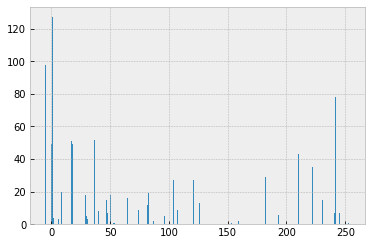

In [97]:
bar(date1,sum_clicks1,align='center')
show() 


Skewness for data (Scipy) :  5.645482436384317

Kurtosis for data (Scipy):  38.03803440290836


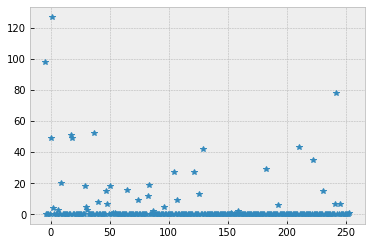

In [98]:

plot(date1, sum_clicks1, '*') 
print( '\nSkewness for data (Scipy) : ', skew(sum_clicks1, bias=False))
print( '\nKurtosis for data (Scipy): ', kurtosis(sum_clicks1, bias=False))
## correcting for bias 

Text(0, 0.5, 'number of clicks')

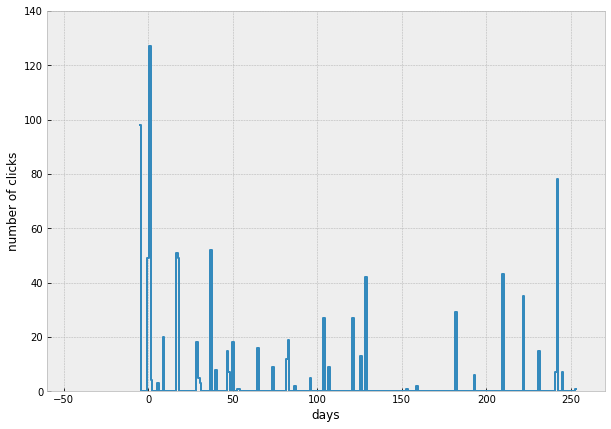

In [99]:
plt.figure(figsize=(10,7))
plt.ylim(0,140)
plt.xlim(-60,270)
plt.plot(date1, sum_clicks1, drawstyle='steps-mid')
plt.xlabel('days')
plt.ylabel('number of clicks')

Kurtosis is 4 approx which means that it is  tails are fatter

In addition, the Skewness is greater than +1 which means that the data is highly skewed. 

It can be seen there is  a great difference between this and previous skewness and kurtosis results. 

##### Example of the same student (after adding the inactive days) 

        student uniq id =  5 

        Skewness:  6.1804850016772255

        Kurtosis: 51.44945961452746


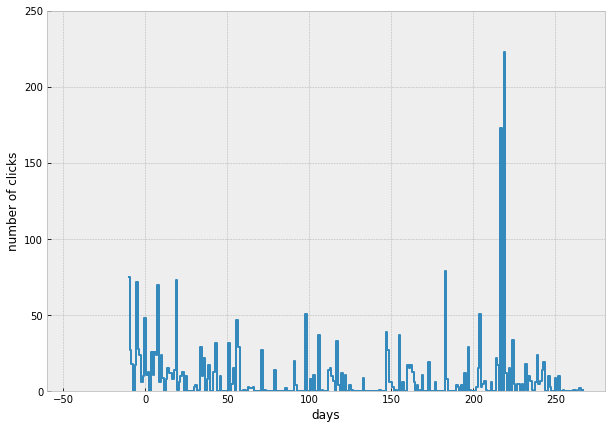

In [100]:
student14 = np.array(dayCounter.loc[(dayCounter.id_uniq == 5)][['date','sum_click']])
date4, sum_clicks4  = zip(*student14)
plt.figure(figsize=(10,7))
plt.ylim(0,250)
plt.xlim(-60,280)
plt.plot(date4, sum_clicks4, drawstyle='steps-mid')
plt.xlabel('days')
plt.ylabel('number of clicks')
print('        student uniq id =  5 ' )
print( '\n        Skewness: ', skew(sum_clicks4, bias=False))
print( '\n        Kurtosis:', kurtosis(sum_clicks4, bias=False))
## correcting for bias 

        student uniq id =  20

        Skewness:  4.726967173083654

        Kurtosis: 28.36335268138341


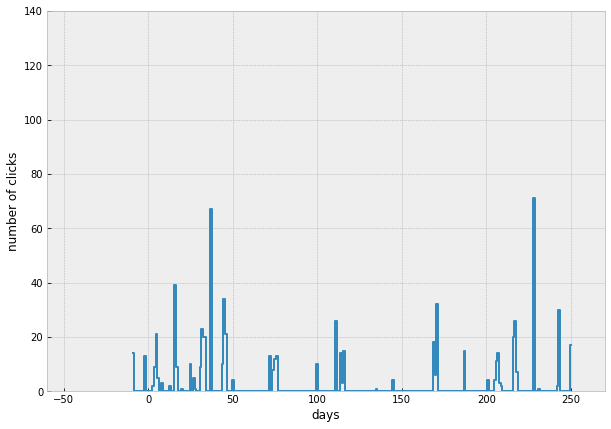

In [101]:
student15 = np.array(dayCounter.loc[(dayCounter.id_uniq == 20)][['date','sum_click']])
date5, sum_clicks5  = zip(*student15)
plt.figure(figsize=(10,7))
plt.ylim(0,140)
plt.xlim(-60,270)
plt.plot(date5, sum_clicks5, drawstyle='steps-mid')
plt.xlabel('days')
plt.ylabel('number of clicks')
print('        student uniq id =  20' )
print( '\n        Skewness: ', skew(sum_clicks5, bias=False))
print( '\n        Kurtosis:', kurtosis(sum_clicks5, bias=False))
## correcting for bias 

        student uniq id =  57

        Skewness:  1.9452116976390907

        Kurtosis: 2.5944495233689153


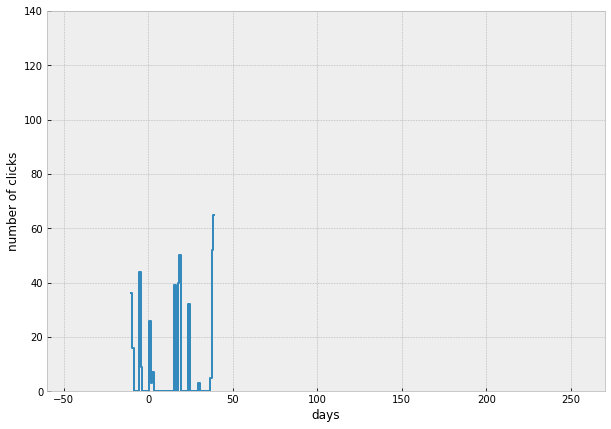

In [102]:
student16 = np.array(dayCounter.loc[(dayCounter.id_uniq == 57)][['date','sum_click']])
date6, sum_clicks6  = zip(*student16)
plt.figure(figsize=(10,7))
plt.ylim(0,140)
plt.xlim(-60,270)
plt.plot(date6, sum_clicks6, drawstyle='steps-mid')
plt.xlabel('days')
plt.ylabel('number of clicks')
print('        student uniq id =  57' )
print( '\n        Skewness: ', skew(sum_clicks6, bias=False))
print( '\n        Kurtosis:', kurtosis(sum_clicks6, bias=False))
## correcting for bias 

        student uniq id =  76

        Skewness:  3.436777779699862

        Kurtosis: 17.551139267656218


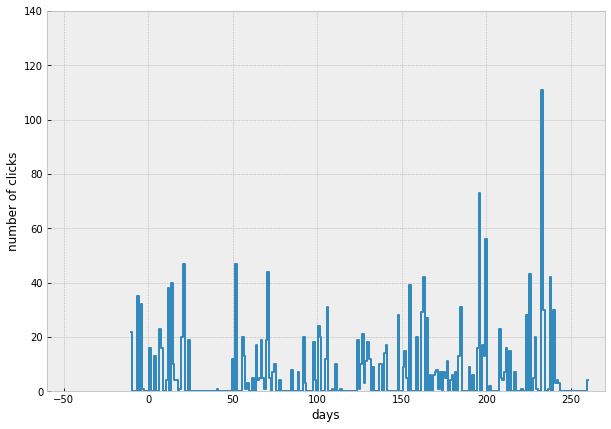

In [103]:
student17 = np.array(dayCounter.loc[(dayCounter.id_uniq == 76)][['date','sum_click']]) 
date7, sum_clicks7  = zip(*student17)
plt.figure(figsize=(10,7))
plt.ylim(0,140) 
plt.xlim(-60,270)
plt.plot(date7, sum_clicks7, drawstyle='steps-mid')
plt.xlabel('days')
plt.ylabel('number of clicks')
print('        student uniq id =  76' )
print( '\n        Skewness: ', skew(sum_clicks7, bias=False))
print( '\n        Kurtosis:', kurtosis(sum_clicks7, bias=False))
## correcting for bias 

        student uniq id =  7806

        Skewness:  -0.5855827262813871

        Kurtosis: -1.5


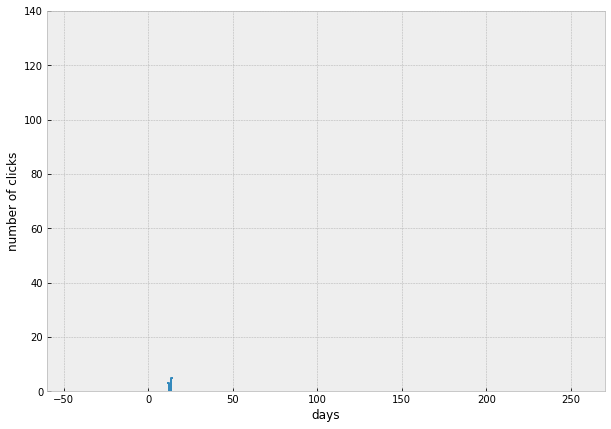

In [104]:
student18 = np.array(dayCounter.loc[(dayCounter.id_uniq == 9459)][['date','sum_click']]) 
date8, sum_clicks8  = zip(*student18)
plt.figure(figsize=(10,7))
plt.ylim(0,140) 
plt.xlim(-60,270)
plt.plot(date8, sum_clicks8, drawstyle='steps-mid')
plt.xlabel('days')
plt.ylabel('number of clicks')
print('        student uniq id =  7806' )
print( '\n        Skewness: ', skew(sum_clicks8, bias=False))
print( '\n        Kurtosis:', kurtosis(sum_clicks8, bias=False))
## correcting for bias 

##### Example of one student who only interacted with VLE before the course starts

In [105]:
## Example of one student
student13 = np.array(studentsVleMergedTEST.loc[(studentsVleMergedTEST.id_uniq == 4274)][['date','sum_click']])
student13

array([[-2,  6]], dtype=int64)

In [106]:
student13.dtype

dtype('int64')

In [0]:
date2, sum_clicks2 = zip(*student13)


Skewness for data (Scipy) :  0.0

Kurtosis for data (Scipy):  -3.0


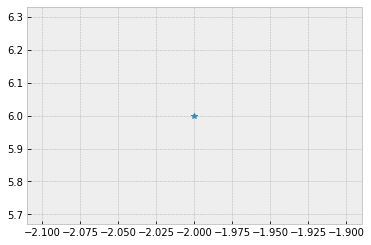

In [108]:

plot(date2, sum_clicks2, '*') 
print( '\nSkewness for data (Scipy) : ', skew(sum_clicks2, bias=False))
print( '\nKurtosis for data (Scipy): ', kurtosis(sum_clicks2, bias=False))
## correcting for bias 

In [109]:
## out of curoisty, did this student actually pass or fail? ,, though we are still not going to use these records.. won't drop them ,, they will be dropped automatically later when merging 
studentsVleMerged.loc[(studentsVleMerged.id_uniq == 4274)]

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,final_result,id_uniq
988716,BBB,2014B,634615,768351,-2,1,homepage,Fail,4274
988717,BBB,2014B,634615,768396,-2,1,subpage,Fail,4274
988718,BBB,2014B,634615,768472,-2,3,resource,Fail,4274
988719,BBB,2014B,634615,768536,-2,1,resource,Fail,4274


the student failed since he only clicked 6 times 2 days before the course starts.

##### All records

In [110]:
studentsVleMergedTEST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552622 entries, 0 to 1552621
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   id_uniq    1552622 non-null  int64
 1   date       1552622 non-null  int64
 2   sum_click  1552622 non-null  int64
dtypes: int64(3)
memory usage: 35.5 MB


In [0]:
## create a 2d numpy array for each student (Data, Number of Clicks) as a dictionary
arr ={}
for idd  in studentIDs:
    arr[idd] = np.array(dayCounter.loc[dayCounter.id_uniq == idd][['date','sum_click']])

In [0]:
## create a 2d numpy array for each student (Data, Number of Clicks) as a dictionary

skewnessKurtosis = []
for idt in studentIDs:
    date, sum_clicks = zip(*arr[idt])
    skewnessKurtosis.append({'id_uniq': idt, 'Skewness': round(skew(sum_clicks,bias=False), 5) , 'Kurtosis': round(kurtosis(sum_clicks,bias=False), 5)})

skewnessKurtosis = pd.DataFrame(skewnessKurtosis)

In [113]:
skewnessKurtosis

,id_uniq,Skewness,Kurtosis
0,1,5.64548,38.03803
1,2,3.54321,13.88923
2,3,2.07997,4.14459
3,4,4.36341,22.86516
4,5,6.18049,51.44946
...,...,...,...
21184,21185,5.46492,31.73736
21185,21186,2.96720,7.89023
21186,21187,6.00494,40.05912
21187,21188,5.66651,34.26708


#### Each day as a feature (from day 0)

In [114]:
## converting column values (activity type) to different columns and filling them with data from 'beforeCourseStarts'
dayCounterCopyPivoted = dayCounterCopy.pivot(index='id_uniq', columns='date', values='sum_click')\
            .reset_index()
dayCounterCopyPivoted.columns.name=None
print(dayCounterCopyPivoted)

       id_uniq     0      1     2     3     4  ...  264  265  266  267  268  269
0            1  49.0  127.0   4.0   0.0   0.0  ...  NaN  NaN  NaN  NaN  NaN  NaN
1            2  48.0   16.0   0.0   0.0  29.0  ...  NaN  NaN  NaN  NaN  NaN  NaN
2            3   0.0   22.0   0.0   0.0   0.0  ...  1.0  NaN  NaN  NaN  NaN  NaN
3            4   0.0   17.0  11.0  11.0   8.0  ...  NaN  NaN  NaN  NaN  NaN  NaN
4            5  48.0   11.0  13.0   0.0  26.0  ...  1.0  2.0  0.0  1.0  NaN  NaN
...        ...   ...    ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...
21093    21185   0.0    0.0   0.0  24.0   0.0  ...  NaN  NaN  NaN  NaN  NaN  NaN
21094    21186   1.0    0.0   0.0   0.0   0.0  ...  NaN  NaN  NaN  NaN  NaN  NaN
21095    21187   NaN    NaN   NaN   NaN   NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
21096    21188   0.0    0.0   0.0   0.0   0.0  ...  NaN  NaN  NaN  NaN  NaN  NaN
21097    21189   0.0    0.0  15.0  10.0   4.0  ...  NaN  NaN  NaN  NaN  NaN  NaN

[21098 rows x 271 columns]


In [115]:
## filling nulls with zero
dayCounterCopyPivoted = dayCounterCopyPivoted.fillna(0)
dayCounterCopyPivoted

,id_uniq,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269
0,1,49.0,127.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,78.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,48.0,16.0,0.0,0.0,29.0,9.0,73.0,7.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,19.0,12.0,26.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,22.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,41.0,19.0,7.0,52.0,6.0,4.0,0.0,41.0,5.0,49.0,0.0,9.0,0.0,4.0,14.0,3.0,4.0,0.0,0.0,16.0,9.0,37.0,15.0,0.0,8.0,3.0,0.0,0.0,20.0,50.0,...,26.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,30.0,6.0,25.0,10.0,30.0,4.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,17.0,11.0,11.0,8.0,0.0,14.0,0.0,0.0,0.0,40.0,34.0,11.0,31.0,0.0,0.0,0.0,0.0,24.0,3.0,10.0,9.0,0.0,36.0,4.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,16.0,...,0.0,5.0,0.0,0.0,7.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,48.0,11.0,13.0,0.0,26.0,11.0,26.0,24.0,70.0,6.0,24.0,9.0,0.0,8.0,15.0,12.0,12.0,8.0,14.0,73.0,1.0,6.0,10.0,13.0,0.0,10.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,1.0,29.0,10.0,22.0,0.0,8.0,...,5.0,1.0,18.0,0.0,10.0,7.0,1.0,0.0,6.0,24.0,5.0,7.0,14.0,19.0,0.0,0.0,10.0,3.0,0.0,0.0,9.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21093,21185,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21094,21186,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,17.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21095,21187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21096,21188,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
dayCounterCopyPivoted.columns = dayCounterCopyPivoted.columns.map(str)
#changing the type of column names from int to string, to add a prefix

In [118]:
## adding a prefix to the new columns to distinguish them from other columns (after group)
dayCounterCopyPivoted.columns = [ 'day_'+col if col != 'id_uniq'  else col for col in dayCounterCopyPivoted.columns]
dayCounterCopyPivoted

,id_uniq,day_0,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,day_32,day_33,day_34,day_35,day_36,day_37,day_38,...,day_230,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,day_250,day_251,day_252,day_253,day_254,day_255,day_256,day_257,day_258,day_259,day_260,day_261,day_262,day_263,day_264,day_265,day_266,day_267,day_268,day_269
0,1,49.0,127.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,78.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,48.0,16.0,0.0,0.0,29.0,9.0,73.0,7.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,19.0,12.0,26.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,22.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,41.0,19.0,7.0,52.0,6.0,4.0,0.0,41.0,5.0,49.0,0.0,9.0,0.0,4.0,14.0,3.0,4.0,0.0,0.0,16.0,9.0,37.0,15.0,0.0,8.0,3.0,0.0,0.0,20.0,50.0,...,26.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,30.0,6.0,25.0,10.0,30.0,4.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,17.0,11.0,11.0,8.0,0.0,14.0,0.0,0.0,0.0,40.0,34.0,11.0,31.0,0.0,0.0,0.0,0.0,24.0,3.0,10.0,9.0,0.0,36.0,4.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,16.0,...,0.0,5.0,0.0,0.0,7.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,48.0,11.0,13.0,0.0,26.0,11.0,26.0,24.0,70.0,6.0,24.0,9.0,0.0,8.0,15.0,12.0,12.0,8.0,14.0,73.0,1.0,6.0,10.0,13.0,0.0,10.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,1.0,29.0,10.0,22.0,0.0,8.0,...,5.0,1.0,18.0,0.0,10.0,7.0,1.0,0.0,6.0,24.0,5.0,7.0,14.0,19.0,0.0,0.0,10.0,3.0,0.0,0.0,9.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21093,21185,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21094,21186,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,17.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21095,21187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21096,21188,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Number of active and Inactive days Before & After course starts

In [0]:
Active_InactiveDays = []

for idt in studentIDs:
    #print(idt)
    numActiveBeforeCourseStarts = 0
    numInactiveAfterCourseStarts = 0
    numActiveAfterCourseStarts =0
    date, sum_clicks = zip(*arr[idt])
    #created a new list that starts from 0 till the max number in the date list, so we can loop through it 
    max_date = max(date) 
    date_list = range(0, max_date+1)
    i = 0 
    for datee in date:
        if (datee < 0): 
           numActiveBeforeCourseStarts += 1
           #print('less than 0' + str(datee))
        elif(datee == date_list[i]):
           #print('*** in the list' + str(datee) + " list"+  str(date_list[i]))
           numActiveAfterCourseStarts +=1
           i +=1 
        elif (datee > date_list[i]):  # if for example the student clicked on day 1 and then day 5 so 1 and 5 are only in the (datee) list,  then it will compare 5 > 2 
            #print('outside the list' + str(datee)+ " list"+ str(date_list[i]))
            while (datee > date_list[i]  ):  # or if (i<datee)
              # as long as we are here 5 > 2, the values will be used 5 > 3, 5> 4, and finally when 5 is not greater than 5 it will go outside the while loop to the last if 
              #print('in while loop' + str(datee)+ " list"+ str(date_list[i]))
              numInactiveAfterCourseStarts +=1
              i +=1 
            if (datee == date_list[i]  ): 
              numActiveAfterCourseStarts +=1
              #print('in List while loop *** ' + str(datee)+ " list"+ str(date_list[i]))
              i +=1
    Active_InactiveDays.append({'id_uniq': idt, 'numActiveDaysBeforeCourseStarts': numActiveBeforeCourseStarts , 'numInctiveDaysAfterCourseStarts':numInactiveAfterCourseStarts, 'numActiveDaysAfterCourseStarts': numActiveAfterCourseStarts})

Active_InactiveDays = pd.DataFrame(Active_InactiveDays)

In [120]:
studentsVleMergedTotalNumClicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21189 entries, 0 to 21188
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   code_module        21189 non-null  object
 1   code_presentation  21189 non-null  object
 2   id_student         21189 non-null  int64 
 3   id_uniq            21189 non-null  int64 
 4   sum_click          21189 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 827.8+ KB


#### How early the student start clicking

In [0]:
earlyClickingBeforeCourseStarts = []
for idt in studentIDs:
    #print(idt)
    numEarlyClickingBeforeCourseStarts=0
    date, sum_clicks = zip(*arr[idt])
    #n = len(date) 
    max_date = max(date) 
    date_list = range(0, max_date+1)
    i = 0 
    for datee in date:
        if (datee < 0): 
          #if student clicked before the course starts the value of date will be negative hence this condition
           numEarlyClickingBeforeCourseStarts= -1*datee
           i += 1
     #      print('less than 0 ' + str(datee))
           break
        elif(datee >= 0):
          # otherwise, if the student only clicked on the starting day of course (day 0) or after, then put 0 in that column 
      #     print('*** Equal to Zero and more ' + str(datee) + " list"+  str(date_list[i]))
           numEarlyClickingBeforeCourseStarts = 0
           i +=1
           break 

    earlyClickingBeforeCourseStarts.append({'id_uniq': idt, 'howManyDaysBeforeCourseStartClick': numEarlyClickingBeforeCourseStarts })

earlyClickingBeforeCourseStarts = pd.DataFrame(earlyClickingBeforeCourseStarts)



#### Merging all features 

In [122]:
studentsEarly = pd.merge(studentsVleMergedTotalNumClicks,earlyClickingBeforeCourseStarts ,on = ['id_uniq'])
studentsEarly.head(50)

,code_module,code_presentation,id_student,id_uniq,sum_click,howManyDaysBeforeCourseStartClick
0,AAA,2013J,11391,1,934,5
1,AAA,2013J,28400,2,1435,10
2,AAA,2013J,31604,3,2158,10
3,AAA,2013J,32885,4,1034,10
4,AAA,2013J,38053,5,2445,10
5,AAA,2013J,45462,6,1492,10
6,AAA,2013J,45642,7,1428,9
7,AAA,2013J,52130,8,1894,4
8,AAA,2013J,57506,9,1319,10
9,AAA,2013J,58873,10,1732,10


In [123]:
studentsVLEAddedFeatures = pd.merge(studentsEarly,Active_InactiveDays , on = ['id_uniq'])
studentsVLEAddedFeatures

,code_module,code_presentation,id_student,id_uniq,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts
0,AAA,2013J,11391,1,934,5,5,0,254
1,AAA,2013J,28400,2,1435,10,10,0,240
2,AAA,2013J,31604,3,2158,10,10,0,265
3,AAA,2013J,32885,4,1034,10,10,0,248
4,AAA,2013J,38053,5,2445,10,10,0,268
...,...,...,...,...,...,...,...,...,...
21184,GGG,2014J,2620947,21185,476,4,4,0,249
21185,GGG,2014J,2640965,21186,41,4,4,0,20
21186,GGG,2014J,2645731,21187,893,0,0,19,229
21187,GGG,2014J,2648187,21188,312,10,10,0,228


In [124]:
studentsVLEAddedFeatures2 = pd.merge(skewnessKurtosis, studentsVLEAddedFeatures, on=['id_uniq'])
studentsVLEAddedFeatures2

,id_uniq,Skewness,Kurtosis,code_module,code_presentation,id_student,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts
0,1,5.64548,38.03803,AAA,2013J,11391,934,5,5,0,254
1,2,3.54321,13.88923,AAA,2013J,28400,1435,10,10,0,240
2,3,2.07997,4.14459,AAA,2013J,31604,2158,10,10,0,265
3,4,4.36341,22.86516,AAA,2013J,32885,1034,10,10,0,248
4,5,6.18049,51.44946,AAA,2013J,38053,2445,10,10,0,268
...,...,...,...,...,...,...,...,...,...,...,...
21184,21185,5.46492,31.73736,GGG,2014J,2620947,476,4,4,0,249
21185,21186,2.96720,7.89023,GGG,2014J,2640965,41,4,4,0,20
21186,21187,6.00494,40.05912,GGG,2014J,2645731,893,0,0,19,229
21187,21188,5.66651,34.26708,GGG,2014J,2648187,312,10,10,0,228


In [125]:
studentsVLEAddedFeatures3 = pd.merge(studentsVLEAddedFeatures2, studentsVleMergedBeforeAfterPivoted, on=['id_uniq'])
studentsVLEAddedFeatures3

,id_uniq,Skewness,Kurtosis,code_module,code_presentation,id_student,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,subpage_before,url_before,dataplus_after,dualpane_after,externalquiz_after,folder_after,forumng_after,glossary_after,homepage_after,htmlactivity_after,oucollaborate_after,oucontent_after,ouelluminate_after,ouwiki_after,page_after,questionnaire_after,quiz_after,repeatactivity_after,resource_after,sharedsubpage_after,subpage_after,url_after
0,1,5.64548,38.03803,AAA,2013J,11391,934,5,5,0,254,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,191.0,0.0,131.0,0.0,0.0,475.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,21.0,5.0
1,2,3.54321,13.88923,AAA,2013J,28400,1435,10,10,0,240,0.0,0.0,0.0,0.0,73.0,0.0,46.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,23.0,7.0,10.0,0.0,0.0,0.0,344.0,0.0,278.0,0.0,0.0,476.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,64.0,41.0
2,3,2.07997,4.14459,AAA,2013J,31604,2158,10,10,0,265,0.0,0.0,0.0,0.0,29.0,1.0,30.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,19.0,3.0,2.0,0.0,0.0,0.0,605.0,0.0,402.0,0.0,0.0,758.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,125.0,87.0
3,4,4.36341,22.86516,AAA,2013J,32885,1034,10,10,0,248,0.0,0.0,0.0,0.0,73.0,2.0,52.0,0.0,0.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,17.0,3.0,0.0,0.0,0.0,0.0,121.0,2.0,152.0,0.0,0.0,353.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,62.0,11.0
4,5,6.18049,51.44946,AAA,2013J,38053,2445,10,10,0,268,0.0,0.0,0.0,0.0,122.0,0.0,55.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,15.0,1.0,7.0,0.0,0.0,0.0,753.0,4.0,457.0,0.0,0.0,822.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,76.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,21185,5.46492,31.73736,GGG,2014J,2620947,476,4,4,0,249,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.0,4.0,86.0,0.0,0.0,203.0,0.0,0.0,0.0,0.0,116.0,0.0,23.0,0.0,19.0,0.0
21185,21186,2.96720,7.89023,GGG,2014J,2640965,41,4,4,0,20,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,9.0,0.0
21186,21187,6.00494,40.05912,GGG,2014J,2645731,893,0,0,19,229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,5.0,167.0,0.0,0.0,348.0,0.0,0.0,0.0,0.0,152.0,0.0,109.0,0.0,47.0,0.0
21187,21188,5.66651,34.26708,GGG,2014J,2648187,312,10,10,0,228,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,57.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,129.0,0.0,15.0,0.0,17.0,0.0


In [126]:
studentsVLEAddedFeatures4 = pd.merge(studentsVLEAddedFeatures3, dayCounterCopyPivoted, on=['id_uniq'])
studentsVLEAddedFeatures4
## students who only interacted with VLE before the course starts will be dropped 

,id_uniq,Skewness,Kurtosis,code_module,code_presentation,id_student,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,subpage_before,url_before,dataplus_after,dualpane_after,externalquiz_after,folder_after,forumng_after,glossary_after,homepage_after,htmlactivity_after,oucollaborate_after,...,day_230,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,day_250,day_251,day_252,day_253,day_254,day_255,day_256,day_257,day_258,day_259,day_260,day_261,day_262,day_263,day_264,day_265,day_266,day_267,day_268,day_269
0,1,5.64548,38.03803,AAA,2013J,11391,934,5,5,0,254,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,191.0,0.0,131.0,0.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,78.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3.54321,13.88923,AAA,2013J,28400,1435,10,10,0,240,0.0,0.0,0.0,0.0,73.0,0.0,46.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,23.0,7.0,10.0,0.0,0.0,0.0,344.0,0.0,278.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2.07997,4.14459,AAA,2013J,31604,2158,10,10,0,265,0.0,0.0,0.0,0.0,29.0,1.0,30.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,19.0,3.0,2.0,0.0,0.0,0.0,605.0,0.0,402.0,0.0,0.0,...,26.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,30.0,6.0,25.0,10.0,30.0,4.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,4.36341,22.86516,AAA,2013J,32885,1034,10,10,0,248,0.0,0.0,0.0,0.0,73.0,2.0,52.0,0.0,0.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,17.0,3.0,0.0,0.0,0.0,0.0,121.0,2.0,152.0,0.0,0.0,...,0.0,5.0,0.0,0.0,7.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,6.18049,51.44946,AAA,2013J,38053,2445,10,10,0,268,0.0,0.0,0.0,0.0,122.0,0.0,55.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,15.0,1.0,7.0,0.0,0.0,0.0,753.0,4.0,457.0,0.0,0.0,...,5.0,1.0,18.0,0.0,10.0,7.0,1.0,0.0,6.0,24.0,5.0,7.0,14.0,19.0,0.0,0.0,10.0,3.0,0.0,0.0,9.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21093,21185,5.46492,31.73736,GGG,2014J,2620947,476,4,4,0,249,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.0,4.0,86.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21094,21186,2.96720,7.89023,GGG,2014J,2640965,41,4,4,0,20,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21095,21187,6.00494,40.05912,GGG,2014J,2645731,893,0,0,19,229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,5.0,167.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0

In [127]:
csv_studentInfoRegUpdated2 = pd.merge(csv_studentInfoRegUpdated, csv_courses, on=['code_module', 'code_presentation'])
csv_studentInfoRegUpdated2

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100,greaterOrEqual55,0,240,N,Pass,-159.0,268
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30,35-55,0,60,N,Pass,-53.0,268
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60,35-55,0,60,N,Pass,-52.0,268
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60,0-35,0,60,N,Pass,-176.0,268
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90,35-55,0,60,N,Pass,-110.0,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21551,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90,0-35,0,30,Y,Pass,-23.0,269
21552,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0,269
21553,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50,35-55,0,30,N,Pass,-23.0,269
21554,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30,0-35,0,30,Y,Pass,-129.0,269


In [128]:
allData = pd.merge(csv_studentInfoRegUpdated2, studentsVLEAddedFeatures4, on=['code_module', 'code_presentation','id_student'])
allData

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,id_uniq,Skewness,Kurtosis,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,...,day_230,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,day_250,day_251,day_252,day_253,day_254,day_255,day_256,day_257,day_258,day_259,day_260,day_261,day_262,day_263,day_264,day_265,day_266,day_267,day_268,day_269
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100,greaterOrEqual55,0,240,N,Pass,-159.0,268,1,5.64548,38.03803,934,5,5,0,254,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,78.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30,35-55,0,60,N,Pass,-53.0,268,2,3.54321,13.88923,1435,10,10,0,240,0.0,0.0,0.0,0.0,73.0,0.0,46.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60,35-55,0,60,N,Pass,-52.0,268,3,2.07997,4.14459,2158,10,10,0,265,0.0,0.0,0.0,0.0,29.0,1.0,30.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,26.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,30.0,6.0,25.0,10.0,30.0,4.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60,0-35,0,60,N,Pass,-176.0,268,4,4.36341,22.86516,1034,10,10,0,248,0.0,0.0,0.0,0.0,73.0,2.0,52.0,0.0,0.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,5.0,0.0,0.0,7.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90,35-55,0,60,N,Pass,-110.0,268,5,6.18049,51.44946,2445,10,10,0,268,0.0,0.0,0.0,0.0,122.0,0.0,55.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,5.0,1.0,18.0,0.0,10.0,7.0,1.0,0.0,6.0,24.0,5.0,7.0,14.0,19.0,0.0,0.0,10.0,3.0,0.0,0.0,9.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21093,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90,0-35,0,30,Y,Pass,-23.0,269,21185,5.46492,31.73736,476,4,4,0,249,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21094,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0,269,21186,2.96720,7.89023,41,4,4,0,20,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21095,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50,35-55,0,30,N,Pass,-23.0,269,21187,6.00494,40.0

#### Splitting Year and Starting month of Code_Presentation

In [129]:
allData['year'] = allData['code_presentation'] 
allData.head(20)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,id_uniq,Skewness,Kurtosis,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,...,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,day_250,day_251,day_252,day_253,day_254,day_255,day_256,day_257,day_258,day_259,day_260,day_261,day_262,day_263,day_264,day_265,day_266,day_267,day_268,day_269,year
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100,greaterOrEqual55,0,240,N,Pass,-159.0,268,1,5.64548,38.03803,934,5,5,0,254,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,78.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013J
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30,35-55,0,60,N,Pass,-53.0,268,2,3.54321,13.88923,1435,10,10,0,240,0.0,0.0,0.0,0.0,73.0,0.0,46.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013J
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60,35-55,0,60,N,Pass,-52.0,268,3,2.07997,4.14459,2158,10,10,0,265,0.0,0.0,0.0,0.0,29.0,1.0,30.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,30.0,6.0,25.0,10.0,30.0,4.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2013J
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60,0-35,0,60,N,Pass,-176.0,268,4,4.36341,22.86516,1034,10,10,0,248,0.0,0.0,0.0,0.0,73.0,2.0,52.0,0.0,0.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,5.0,0.0,0.0,7.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013J
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90,35-55,0,60,N,Pass,-110.0,268,5,6.18049,51.44946,2445,10,10,0,268,0.0,0.0,0.0,0.0,122.0,0.0,55.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,1.0,18.0,0.0,10.0,7.0,1.0,0.0,6.0,24.0,5.0,7.0,14.0,19.0,0.0,0.0,10.0,3.0,0.0,0.0,9.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,2013J
5,AAA,2013J,45462,M,Scotland,HE Qualification,30-40,0-35,0,60,N,Pass,-67.0,268,6,3.80140,17.55810,1492,10,10,0,268,0.0,0.0,0.0,0.0,15.0,0.0,33.0,0.0,0.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,10.0,44.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2013J
6,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100,0-35,0,120,N,Pass,-29.0,268,7,3.12750,12.03823,1428,9,9,0,265,0.0,0.0,0.0,0.0,11.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,18.0,37.0,8.0,0.0,0.0,31.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,2013J
7,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80,0-35,0,90,N,Pass,-33.0,268,8,3.45507,17.73025,1894,4,4,0,246,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,15.0,13.0,17.0,0.0,23.0,7.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013J
8,AAA,2013J,57506,M,South Region,Lower Than A Lev

In [130]:
allData.loc[allData['code_presentation'] == '2013J', 'code_presentation'] = 10 # 2013J --> started in October (month #: 10)
allData.loc[allData['code_presentation'] == '2014J', 'code_presentation'] = 10 # 2014J --> started in October (month #: 10)
allData.loc[allData['code_presentation'] == '2013B', 'code_presentation'] = 2 # 2013B --> started in Feb (month #: 02)
allData.loc[allData['code_presentation'] == '2014B', 'code_presentation'] = 2 # 2014B --> started in Feb (month #: 02)

allData.loc[allData['year'] == '2013J', 'year'] = 2013 # 2013J --> started in October (month #: 10)
allData.loc[allData['year'] == '2014J', 'year'] = 2014 # 2014J --> started in October (month #: 10)
allData.loc[allData['year'] == '2013B', 'year'] = 2013 # 2013B --> started in Feb (month #: 02)
allData.loc[allData['year'] == '2014B', 'year'] = 2014 # 2014B --> started in Feb (month #: 02)
allData
allData

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,id_uniq,Skewness,Kurtosis,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,...,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,day_250,day_251,day_252,day_253,day_254,day_255,day_256,day_257,day_258,day_259,day_260,day_261,day_262,day_263,day_264,day_265,day_266,day_267,day_268,day_269,year
0,AAA,10,11391,M,East Anglian Region,HE Qualification,90-100,greaterOrEqual55,0,240,N,Pass,-159.0,268,1,5.64548,38.03803,934,5,5,0,254,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,78.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
1,AAA,10,28400,F,Scotland,HE Qualification,20-30,35-55,0,60,N,Pass,-53.0,268,2,3.54321,13.88923,1435,10,10,0,240,0.0,0.0,0.0,0.0,73.0,0.0,46.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
2,AAA,10,31604,F,South East Region,A Level or Equivalent,50-60,35-55,0,60,N,Pass,-52.0,268,3,2.07997,4.14459,2158,10,10,0,265,0.0,0.0,0.0,0.0,29.0,1.0,30.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,30.0,6.0,25.0,10.0,30.0,4.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2013
3,AAA,10,32885,F,West Midlands Region,Lower Than A Level,50-60,0-35,0,60,N,Pass,-176.0,268,4,4.36341,22.86516,1034,10,10,0,248,0.0,0.0,0.0,0.0,73.0,2.0,52.0,0.0,0.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,5.0,0.0,0.0,7.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
4,AAA,10,38053,M,Wales,A Level or Equivalent,80-90,35-55,0,60,N,Pass,-110.0,268,5,6.18049,51.44946,2445,10,10,0,268,0.0,0.0,0.0,0.0,122.0,0.0,55.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,1.0,18.0,0.0,10.0,7.0,1.0,0.0,6.0,24.0,5.0,7.0,14.0,19.0,0.0,0.0,10.0,3.0,0.0,0.0,9.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21093,GGG,10,2620947,F,Scotland,A Level or Equivalent,80-90,0-35,0,30,Y,Pass,-23.0,269,21185,5.46492,31.73736,476,4,4,0,249,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
21094,GGG,10,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0,269,21186,2.96720,7.89023,41,4,4,0,20,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
21095,GGG,10,2645731,F,East Anglian Region,Lower Than A Level,40-50,35-55,0,30,N,Pass,-23.0,269,21187,6.00494,40.05912,893,0,0,19,229,0

In [131]:
allData = allData.rename(columns={'code_module': 'course', 'code_presentation': 'monthCourseBegins'})
allData

,course,monthCourseBegins,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,id_uniq,Skewness,Kurtosis,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,...,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,day_250,day_251,day_252,day_253,day_254,day_255,day_256,day_257,day_258,day_259,day_260,day_261,day_262,day_263,day_264,day_265,day_266,day_267,day_268,day_269,year
0,AAA,10,11391,M,East Anglian Region,HE Qualification,90-100,greaterOrEqual55,0,240,N,Pass,-159.0,268,1,5.64548,38.03803,934,5,5,0,254,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,78.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
1,AAA,10,28400,F,Scotland,HE Qualification,20-30,35-55,0,60,N,Pass,-53.0,268,2,3.54321,13.88923,1435,10,10,0,240,0.0,0.0,0.0,0.0,73.0,0.0,46.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
2,AAA,10,31604,F,South East Region,A Level or Equivalent,50-60,35-55,0,60,N,Pass,-52.0,268,3,2.07997,4.14459,2158,10,10,0,265,0.0,0.0,0.0,0.0,29.0,1.0,30.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,30.0,6.0,25.0,10.0,30.0,4.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2013
3,AAA,10,32885,F,West Midlands Region,Lower Than A Level,50-60,0-35,0,60,N,Pass,-176.0,268,4,4.36341,22.86516,1034,10,10,0,248,0.0,0.0,0.0,0.0,73.0,2.0,52.0,0.0,0.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,5.0,0.0,0.0,7.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
4,AAA,10,38053,M,Wales,A Level or Equivalent,80-90,35-55,0,60,N,Pass,-110.0,268,5,6.18049,51.44946,2445,10,10,0,268,0.0,0.0,0.0,0.0,122.0,0.0,55.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,1.0,18.0,0.0,10.0,7.0,1.0,0.0,6.0,24.0,5.0,7.0,14.0,19.0,0.0,0.0,10.0,3.0,0.0,0.0,9.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21093,GGG,10,2620947,F,Scotland,A Level or Equivalent,80-90,0-35,0,30,Y,Pass,-23.0,269,21185,5.46492,31.73736,476,4,4,0,249,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
21094,GGG,10,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0,269,21186,2.96720,7.89023,41,4,4,0,20,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
21095,GGG,10,2645731,F,East Anglian Region,Lower Than A Level,40-50,35-55,0,30,N,Pass,-23.0,269,21187,6.00494,40.05912,893,0,0,19,229,0.0,0.

In [133]:
allData

,course,monthCourseBegins,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,id_uniq,Skewness,Kurtosis,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,...,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,day_250,day_251,day_252,day_253,day_254,day_255,day_256,day_257,day_258,day_259,day_260,day_261,day_262,day_263,day_264,day_265,day_266,day_267,day_268,day_269,year
0,AAA,10,11391,M,East Anglian Region,HE Qualification,90-100,greaterOrEqual55,0,240,N,Pass,-159.0,268,1,5.64548,38.03803,934,5,5,0,254,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,78.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
1,AAA,10,28400,F,Scotland,HE Qualification,20-30,35-55,0,60,N,Pass,-53.0,268,2,3.54321,13.88923,1435,10,10,0,240,0.0,0.0,0.0,0.0,73.0,0.0,46.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
2,AAA,10,31604,F,South East Region,A Level or Equivalent,50-60,35-55,0,60,N,Pass,-52.0,268,3,2.07997,4.14459,2158,10,10,0,265,0.0,0.0,0.0,0.0,29.0,1.0,30.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,30.0,6.0,25.0,10.0,30.0,4.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2013
3,AAA,10,32885,F,West Midlands Region,Lower Than A Level,50-60,0-35,0,60,N,Pass,-176.0,268,4,4.36341,22.86516,1034,10,10,0,248,0.0,0.0,0.0,0.0,73.0,2.0,52.0,0.0,0.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,5.0,0.0,0.0,7.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
4,AAA,10,38053,M,Wales,A Level or Equivalent,80-90,35-55,0,60,N,Pass,-110.0,268,5,6.18049,51.44946,2445,10,10,0,268,0.0,0.0,0.0,0.0,122.0,0.0,55.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,1.0,18.0,0.0,10.0,7.0,1.0,0.0,6.0,24.0,5.0,7.0,14.0,19.0,0.0,0.0,10.0,3.0,0.0,0.0,9.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21093,GGG,10,2620947,F,Scotland,A Level or Equivalent,80-90,0-35,0,30,Y,Pass,-23.0,269,21185,5.46492,31.73736,476,4,4,0,249,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
21094,GGG,10,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0,269,21186,2.96720,7.89023,41,4,4,0,20,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
21095,GGG,10,2645731,F,East Anglian Region,Lower Than A Level,40-50,35-55,0,30,N,Pass,-23.0,269,21187,6.00494,40.05912,893,0,0,19,229,0.0,0.

In [0]:
allData.to_csv("allData.csv", encoding='utf-8', index=False)

### Outliers

In [135]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21098 entries, 0 to 21097
Columns: 333 entries, course to year
dtypes: float64(313), int64(10), object(10)
memory usage: 53.8+ MB


In [0]:
csv_allData= allData.copy()

In [137]:
csv_allData['num_of_prev_attempts'].describe()

count    21098.000000
mean         0.150867
std          0.462295
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: num_of_prev_attempts, dtype: float64

In [138]:
csv_allData.loc[ csv_allData['num_of_prev_attempts'] > 4 ]
## 2 students who have 6 prev attempts 
## 8 students who have 5 prev attempts

,course,monthCourseBegins,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,id_uniq,Skewness,Kurtosis,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,...,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,day_250,day_251,day_252,day_253,day_254,day_255,day_256,day_257,day_258,day_259,day_260,day_261,day_262,day_263,day_264,day_265,day_266,day_267,day_268,day_269,year
1731,BBB,2,2340190,F,Yorkshire Region,Lower Than A Level,20-30,0-35,5,120,N,Fail,-16.0,240,1738,0.00000,-3.00000,5,0,0,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
1776,BBB,2,2608453,F,Scotland,Lower Than A Level,30-40,35-55,5,120,N,Fail,-21.0,240,1783,3.65779,13.90660,2176,4,4,0,227,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
3397,BBB,2,283978,F,South West Region,A Level or Equivalent,20-30,35-55,5,150,Y,Fail,-60.0,234,3409,6.77416,48.70288,42,0,0,40,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
3433,BBB,2,334981,F,South Region,A Level or Equivalent,70-80,35-55,6,120,N,Pass,-64.0,234,3445,7.14210,55.99397,221,0,0,47,163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
5803,BBB,10,1993672,F,West Midlands Region,Lower Than A Level,0-10,35-55,5,60,Y,Fail,-135.0,262,5828,6.38309,46.62105,395,4,4,0,133,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
5885,BBB,10,2681940,F,Scotland,A Level or Equivalent,30-40,35-55,5,60,N,Pass,-36.0,262,5910,4.84318,25.39029,898,0,0,2,236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,85.0,87.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
8925,DDD,2,2643777,M,South Region,Lower Than A Level,10-20,0-35,5,60,N,Fail,-92.0,240,8961,3.44914,13.00013,367,0,0,3,201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
10166,DDD,2,286449,F,East Midlands Region,Lower Than A Level,40-50,0-35,6,120,N,Fail,-34.0,241,10208,4.01269,16.97906,126,16,16,0,39,0.0,0.0,1.0,0.0,21.0,0.0,27.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
11824,DDD,10,2338290,M,East Anglian Region,A Level or Equivalent,80-90,0-35,5,60,N,Pass,-70.0,262,1

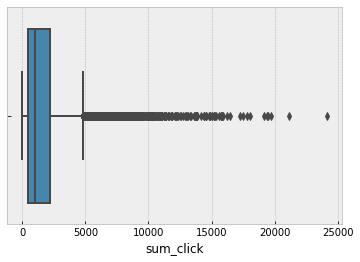

In [139]:
sns.boxplot(csv_allData['sum_click'])

In [140]:
csv_allData.loc[ csv_allData['sum_click'] > 20000 ]
# 6881   has more than 22,000 clicks
# 14467  has more than 20,000 clicks

,course,monthCourseBegins,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,id_uniq,Skewness,Kurtosis,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,...,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,day_250,day_251,day_252,day_253,day_254,day_255,day_256,day_257,day_258,day_259,day_260,day_261,day_262,day_263,day_264,day_265,day_266,day_267,day_268,day_269,year
6853,CCC,10,80868,M,South West Region,Lower Than A Level,80-90,0-35,0,60,N,Pass,-60.0,269,6881,1.58795,2.96238,24139,18,18,0,270,0.0,0.0,0.0,0.0,19.0,0.0,89.0,0.0,0.0,466.0,0.0,0.0,0.0,0.0,42.0,0.0,14.0,0.0,...,137.0,30.0,101.0,89.0,99.0,45.0,47.0,106.0,65.0,97.0,165.0,117.0,212.0,139.0,100.0,146.0,127.0,126.0,66.0,181.0,31.0,0.0,17.0,78.0,42.0,5.0,0.0,0.0,0.0,8.0,12.0,5.0,5.0,17.0,22.0,17.0,10.0,4.0,5.0,2014
14413,FFF,2,517269,M,Yorkshire Region,Lower Than A Level,0-10,35-55,1,180,Y,Pass,-15.0,240,14467,1.17091,1.93029,21123,3,3,0,234,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013


In [141]:
csv_allData['sum_click'].describe()
# there are students who have only clicked 5 times and there are even other students who clicked below 5 times and have failed!!

count    21098.000000
mean      1626.498531
std       1848.344852
min          1.000000
25%        426.000000
50%       1001.000000
75%       2171.000000
max      24139.000000
Name: sum_click, dtype: float64

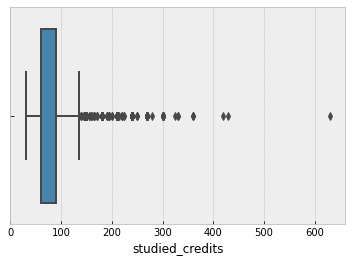

In [142]:
sns.boxplot(csv_allData['studied_credits'])

In [143]:
csv_allData['studied_credits'].describe()

count    21098.000000
mean        74.481230
std         36.818798
min         30.000000
25%         60.000000
50%         60.000000
75%         90.000000
max        630.000000
Name: studied_credits, dtype: float64

In [144]:
csv_allData.loc[ csv_allData['studied_credits'] > 400 ]
## 1 student who have 630 studied credits 
## 2 students who has 420/430 studied credits

,course,monthCourseBegins,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,id_uniq,Skewness,Kurtosis,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,...,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,day_250,day_251,day_252,day_253,day_254,day_255,day_256,day_257,day_258,day_259,day_260,day_261,day_262,day_263,day_264,day_265,day_266,day_267,day_268,day_269,year
43,AAA,10,155550,M,London Region,A Level or Equivalent,0-10,35-55,0,420,N,Pass,-16.0,268,44,3.57286,13.81365,1529,10,10,0,244,0.0,0.0,0.0,0.0,12.0,0.0,19.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,5.0,0.0,13.0,17.0,23.0,3.0,78.0,16.0,27.0,85.0,43.0,80.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
6733,CCC,2,1474869,F,South Region,A Level or Equivalent,90-100,35-55,0,630,Y,Pass,-5.0,241,6761,2.05483,4.51949,11087,4,4,0,239,0.0,0.0,0.0,0.0,0.0,0.0,132.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,311.0,0.0,6.0,0.0,...,51.0,1.0,13.0,0.0,4.0,11.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
17577,FFF,10,131597,M,Scotland,A Level or Equivalent,40-50,0-35,0,430,N,Pass,-52.0,269,17645,5.25797,35.62755,3110,17,17,0,254,0.0,0.0,0.0,0.0,0.0,0.0,17.0,1.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,257.0,0.0,0.0,0.0,191.0,0.0,104.0,196.0,103.0,10.0,0.0,0.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014


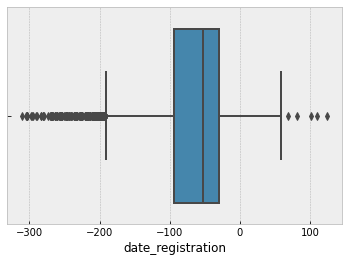

In [145]:
sns.boxplot(csv_allData['date_registration'])

In [146]:
csv_allData['date_registration'].describe()

count    21098.000000
mean       -65.744573
std         46.723548
min       -310.000000
25%        -94.000000
50%        -53.000000
75%        -29.000000
max        124.000000
Name: date_registration, dtype: float64

In [147]:
csv_allData.loc[ csv_allData['date_registration'] > 100 ]

,course,monthCourseBegins,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,id_uniq,Skewness,Kurtosis,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,...,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,day_250,day_251,day_252,day_253,day_254,day_255,day_256,day_257,day_258,day_259,day_260,day_261,day_262,day_263,day_264,day_265,day_266,day_267,day_268,day_269,year
8422,DDD,2,472949,F,London Region,HE Qualification,20-30,35-55,1,120,N,Fail,124.0,240,8454,3.94858,18.30072,140,0,0,127,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
9079,DDD,10,305535,M,West Midlands Region,A Level or Equivalent,0-10,0-35,2,180,N,Pass,101.0,261,9115,3.93515,16.92834,143,0,0,102,121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
17680,FFF,10,357851,M,East Anglian Region,Lower Than A Level,50-60,0-35,2,120,Y,Fail,110.0,269,17748,3.51921,12.14202,67,0,0,111,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014


In [148]:
csv_allData.loc[ csv_allData['date_registration'] < -300 ] 
# 6 of the following list of students regitered before the course started 300 days!  most of them to course CCC 
# All the following 6 students registered for a course that starts in Feb, in addition they are all in the same age band


,course,monthCourseBegins,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,id_uniq,Skewness,Kurtosis,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,...,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,day_250,day_251,day_252,day_253,day_254,day_255,day_256,day_257,day_258,day_259,day_260,day_261,day_262,day_263,day_264,day_265,day_266,day_267,day_268,day_269,year
6033,CCC,2,371901,F,London Region,HE Qualification,30-40,0-35,0,30,N,Pass,-304.0,241,6058,6.79765,49.67463,403,0,0,17,225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
6178,CCC,2,521051,M,North Western Region,A Level or Equivalent,10-20,0-35,0,60,N,Pass,-304.0,241,6204,4.71306,26.65618,553,17,17,0,230,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
6214,CCC,2,536261,M,West Midlands Region,A Level or Equivalent,40-50,0-35,0,60,N,Pass,-304.0,241,6240,6.56847,47.45445,350,16,16,0,208,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
6822,CCC,2,2631703,M,South West Region,A Level or Equivalent,30-40,0-35,0,60,Y,Pass,-303.0,241,6850,8.25596,88.06600,731,14,14,0,241,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
8195,DDD,2,183714,M,South West Region,Lower Than A Level,40-50,0-35,0,60,Y,Pass,-310.0,240,8224,1.18907,1.13637,3289,15,15,0,241,0.0,0.0,0.0,0.0,12.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,...,8.0,10.0,16.0,6.0,10.0,9.0,6.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
14288,FFF,2,476194,M,Scotland,Lower Than A Level,50-60,0-35,0,60,N,Pass,-305.0,240,14342,3.17708,10.57215,3001,10,10,0,241,0.0,0.0,0.0,0.0,46.0,4.0,75.0,0.0,0.0,48.0,4.0,0.0,5.0,0.0,106.0,0.0,31.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013


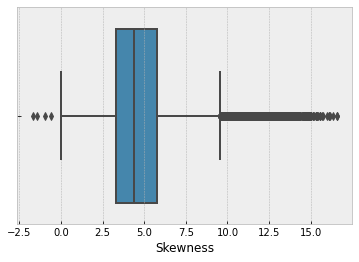

In [149]:
sns.boxplot(csv_allData['Skewness'])

In [150]:
csv_allData.loc[ csv_allData['Skewness'] <  0] 


,course,monthCourseBegins,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,id_uniq,Skewness,Kurtosis,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,...,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,day_250,day_251,day_252,day_253,day_254,day_255,day_256,day_257,day_258,day_259,day_260,day_261,day_262,day_263,day_264,day_265,day_266,day_267,day_268,day_269,year
7777,CCC,10,653700,M,Wales,HE Qualification,70-80,0-35,0,60,N,Fail,-22.0,269,7806,-1.45786,-1.5,21,0,0,30,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
9421,DDD,10,543683,M,Scotland,Lower Than A Level,40-50,35-55,1,60,N,Fail,-135.0,261,9459,-0.58558,-1.5,8,0,0,12,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
12886,EEE,2,613116,F,West Midlands Region,Lower Than A Level,70-80,0-35,0,60,N,Fail,-139.0,241,12939,-1.70239,-1.5,56,1,1,0,2,0.0,0.0,0.0,0.0,15.0,0.0,9.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
19826,GGG,2,198315,F,South Region,A Level or Equivalent,90-100,35-55,1,60,Y,Fail,-29.0,241,19910,-0.93522,-1.5,5,0,0,17,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014


In [151]:
 csv_allData['Skewness'].describe()

count    21098.000000
mean         4.794051
std          2.262918
min         -1.702390
25%          3.280955
50%          4.359490
75%          5.791530
max         16.583730
Name: Skewness, dtype: float64

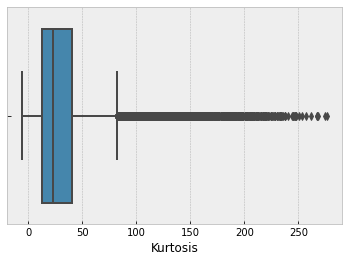

In [152]:
sns.boxplot(csv_allData['Kurtosis'])

In [153]:
csv_allData['Kurtosis'].describe()

count    21098.000000
mean        33.100158
std         33.705007
min         -5.518140
25%         12.585667
50%         22.777130
75%         40.316468
max        276.310560
Name: Kurtosis, dtype: float64

In [154]:
## dropping previously noted id_uniq
##  7876, 17256  num of clicks before course starts  3322, 17##
##  2811, 1279  num of clicks after course starts   13136, 11464
##  3445, 10208   prevattempts  6 (not logical)
##  6761   studied credits 600
##  6881, 14467   has more than 20,000 clicks
##  8454  registered after the course started 120 days ! 
# outliers = [7876, 17256, 2811, 1279 ,3445, 10208, 6761, 6881, 14467, 8454 ]
outliers = [6761]

csv_allData = csv_allData[~csv_allData.id_uniq.isin(outliers)]
csv_allData


,course,monthCourseBegins,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,id_uniq,Skewness,Kurtosis,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,...,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,day_250,day_251,day_252,day_253,day_254,day_255,day_256,day_257,day_258,day_259,day_260,day_261,day_262,day_263,day_264,day_265,day_266,day_267,day_268,day_269,year
0,AAA,10,11391,M,East Anglian Region,HE Qualification,90-100,greaterOrEqual55,0,240,N,Pass,-159.0,268,1,5.64548,38.03803,934,5,5,0,254,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,78.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
1,AAA,10,28400,F,Scotland,HE Qualification,20-30,35-55,0,60,N,Pass,-53.0,268,2,3.54321,13.88923,1435,10,10,0,240,0.0,0.0,0.0,0.0,73.0,0.0,46.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
2,AAA,10,31604,F,South East Region,A Level or Equivalent,50-60,35-55,0,60,N,Pass,-52.0,268,3,2.07997,4.14459,2158,10,10,0,265,0.0,0.0,0.0,0.0,29.0,1.0,30.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,30.0,6.0,25.0,10.0,30.0,4.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2013
3,AAA,10,32885,F,West Midlands Region,Lower Than A Level,50-60,0-35,0,60,N,Pass,-176.0,268,4,4.36341,22.86516,1034,10,10,0,248,0.0,0.0,0.0,0.0,73.0,2.0,52.0,0.0,0.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,5.0,0.0,0.0,7.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
4,AAA,10,38053,M,Wales,A Level or Equivalent,80-90,35-55,0,60,N,Pass,-110.0,268,5,6.18049,51.44946,2445,10,10,0,268,0.0,0.0,0.0,0.0,122.0,0.0,55.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,1.0,18.0,0.0,10.0,7.0,1.0,0.0,6.0,24.0,5.0,7.0,14.0,19.0,0.0,0.0,10.0,3.0,0.0,0.0,9.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21093,GGG,10,2620947,F,Scotland,A Level or Equivalent,80-90,0-35,0,30,Y,Pass,-23.0,269,21185,5.46492,31.73736,476,4,4,0,249,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
21094,GGG,10,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0,269,21186,2.96720,7.89023,41,4,4,0,20,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
21095,GGG,10,2645731,F,East Anglian Region,Lower Than A Level,40-50,35-55,0,30,N,Pass,-23.0,269,21187,6.00494,40.05912,893,0,0,19,229,0.0,0.

### Standarization

In [155]:
csv_allData.columns[-316:]

Index(['sum_click', 'howManyDaysBeforeCourseStartClick',
       'numActiveDaysBeforeCourseStarts', 'numInctiveDaysAfterCourseStarts',
       'numActiveDaysAfterCourseStarts', 'dataplus_before', 'dualpane_before',
       'externalquiz_before', 'folder_before', 'forumng_before',
       ...
       'day_261', 'day_262', 'day_263', 'day_264', 'day_265', 'day_266',
       'day_267', 'day_268', 'day_269', 'year'],
      dtype='object', length=316)

In [156]:
from sklearn import preprocessing
# Create scaler
scaler = preprocessing.RobustScaler()

from sklearn import preprocessing
# Create scaler
scaler = preprocessing.RobustScaler()
#scaler = preprocessing.StandardScaler()
# Transform the feature
csv_allData[['monthCourseBegins', 'module_presentation_length','date_registration','studied_credits','num_of_prev_attempts','Skewness','Kurtosis']] =  scaler.fit_transform(
                 csv_allData[['monthCourseBegins','module_presentation_length','date_registration','studied_credits','num_of_prev_attempts','Skewness','Kurtosis']])


csv_allData[csv_allData.columns[-316:]] =  scaler.fit_transform(
                 csv_allData[csv_allData.columns[-316:]])



csv_allData

,course,monthCourseBegins,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,id_uniq,Skewness,Kurtosis,sum_click,howManyDaysBeforeCourseStartClick,numActiveDaysBeforeCourseStarts,numInctiveDaysAfterCourseStarts,numActiveDaysAfterCourseStarts,dataplus_before,dualpane_before,externalquiz_before,folder_before,forumng_before,glossary_before,homepage_before,htmlactivity_before,oucollaborate_before,oucontent_before,ouelluminate_before,ouwiki_before,page_before,questionnaire_before,quiz_before,repeatactivity_before,resource_before,sharedsubpage_before,...,day_231,day_232,day_233,day_234,day_235,day_236,day_237,day_238,day_239,day_240,day_241,day_242,day_243,day_244,day_245,day_246,day_247,day_248,day_249,day_250,day_251,day_252,day_253,day_254,day_255,day_256,day_257,day_258,day_259,day_260,day_261,day_262,day_263,day_264,day_265,day_266,day_267,day_268,day_269,year
0,AAA,0.0,11391,M,East Anglian Region,HE Qualification,90-100,greaterOrEqual55,0.0,6.0,N,Pass,-1.630769,0.222222,1,0.512046,0.550326,-0.038395,-0.384615,-0.384615,0.0,0.514286,0.0,0.0,0.0,0.0,0.142857,0.0,-0.090909,0.0,0.0,4.470588,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,0.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,78.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,AAA,0.0,28400,F,Scotland,HE Qualification,20-30,35-55,0.0,0.0,N,Pass,0.000000,0.222222,2,-0.325275,-0.320510,0.248711,0.000000,0.000000,0.0,0.114286,0.0,0.0,0.0,0.0,5.214286,0.0,1.681818,0.0,0.0,3.470588,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,AAA,0.0,31604,F,South East Region,A Level or Equivalent,50-60,35-55,0.0,0.0,N,Pass,0.015385,0.222222,3,-0.908074,-0.671914,0.663037,0.000000,0.000000,0.0,0.828571,0.0,0.0,0.0,0.0,2.071429,1.0,0.954545,0.0,0.0,4.470588,0.0,0.0,0.0,0.0,0.0,0.0,1.6,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,30.0,6.0,25.0,10.0,30.0,4.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,AAA,0.0,32885,F,West Midlands Region,Lower Than A Level,50-60,0-35,0.0,0.0,N,Pass,-1.892308,0.222222,4,0.001406,0.003173,0.018911,0.000000,0.000000,0.0,0.342857,0.0,0.0,0.0,0.0,5.214286,2.0,1.954545,0.0,0.0,8.176471,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.0,...,5.0,0.0,0.0,7.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,AAA,0.0,38053,M,Wales,A Level or Equivalent,80-90,35-55,0.0,0.0,N,Pass,-0.876923,0.222222,5,0.725138,1.033959,0.827507,0.000000,0.000000,0.0,0.914286,0.0,0.0,0.0,0.0,8.714286,0.0,2.090909,0.0,0.0,4.470588,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,18.0,0.0,10.0,7.0,1.0,0.0,6.0,24.0,5.0,7.0,14.0,19.0,0.0,0.0,10.0,3.0,0.0,0.0,9.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21093,GGG,0.0,2620947,F,Scotland,A Level or Equivalent,80-90,0-35,0.0,-1.0,Y,Pass,0.461538,0.259259,21185,0.440130,0.323116,-0.300860,-0.461538,-0.461538,0.0,0.371429,0.0,0.0,0.0,0.0,0.000000,0.0,-0.272727,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21094,GGG,0.0,2640965,F,Wales,Lower Than A Level,10-20,0-35,0.0,-1.0,N,Fail,0.753846,0.259259,21186,-0.554696,-0.536842,-0.550143,-0.461538,-0.461538,0.0,-6.171429,0.0,0.0,0.0,0.0,0

### Encoding Features

In [0]:
csv_allData2OHE = csv_allData.copy()
csv_allData2LE = csv_allData.copy()
csv_allData2LE_OHE = csv_allData.copy()


#csv_allData2OHE = pd.get_dummies(csv_allData2OHE, columns=['course','gender','region','highest_education','imd_band','age_band','disability','final_result'], prefix = ['course','gender','region','highest_education','imd_band','age_band','disability','final_result'],  drop_first=True)
csv_allData2OHE = pd.get_dummies(csv_allData2OHE, columns=['course','gender','region','highest_education','imd_band','age_band','disability'], prefix = ['course','gender','region','highest_education','imd_band','age_band','disability'])
csv_allData2OHE['final_result'].replace( {'Fail':1, 'Pass':0},inplace=True)


In [0]:
csv_allData2OHE.to_csv("csv_allData2OHE_f2.csv", encoding='utf-8', index=False)

# Data is ready for MCA, PCA and ML algorithms

In [0]:
data = csv_allData2OHE.copy()

In [0]:
data = data.drop(['id_student', 'id_uniq'], axis=1)

In [0]:
X = data.drop("final_result", 1)       # feature matrix 
y = data['final_result']               # target feature


In [165]:
pip install prince

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Splitting the data into training and testing sets with the same percentages of imbalance as the actual dataset by using stratify
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1234, stratify = y)


# if classes are imbalanced, use stritified folds with cross validation
kfold = StratifiedKFold(n_splits=10, random_state=1234)


In [0]:
X_trainMCA = X_train.copy()
X_trainMCA = X_trainMCA[X_trainMCA.columns[-42:]].copy()
X_testMCA = X_test.copy()
X_testMCA = X_testMCA[X_testMCA.columns[-42:]].copy()

In [0]:
X_trainPCA = X_train.copy()
X_trainPCA = X_trainPCA.iloc[:,:-42]
X_testPCA = X_test.copy()
X_testPCA = X_testPCA.iloc[:,:-42]

In [170]:
import prince
#/***************************************************************************************
#*    Title: PRINCE Library 
#*    Author: MaxHalford 
#*    Availability: can be imported directly, URL: https://github.com/MaxHalford/prince#license
#*
#***************************************************************************************/
pca = prince.PCA(
     n_components=5,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
 )
pca = pca.fit(X_train.iloc[:,:-42])
## fitting pca to the numerical part of the training data

eigen values  [581519.2424499815, 93574.75486162945, 70494.02969496015, 57342.57764444751, 52380.238082866104]


In [0]:
X_trainPCA = pca.transform(X_train.iloc[:,:-42])
X_testPCA = pca.transform(X_test.iloc[:,:-42])


In [172]:
#/***************************************************************************************
#*    Title: PRINCE Library 
#*    Author: MaxHalford 
#*    Availability: can be imported directly, URL: https://github.com/MaxHalford/prince#license
#*
#***************************************************************************************/
mca = prince.MCA(
     n_components=5,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
 )

mca = mca.fit(X_trainMCA[X_trainMCA.columns[-42:]])

print ('eigen values ' , mca.eigenvalues_ )
print ('total inertia ', mca.total_inertia_)

eigen values  [0.2528885876946719, 0.2046286145331407, 0.17717833211369793, 0.17103175814705748, 0.15863699397248301]
total inertia  0.0


In [0]:
X_trainMCA = mca.transform(X_train[X_train.columns[-42:]])
X_testMCA = mca.transform(X_test[X_test.columns[-42:]])


In [0]:
X_trainAll = pd.concat([X_trainMCA, X_trainPCA], axis=1, sort=False)

In [0]:
X_testAll = pd.concat([X_testMCA, X_testPCA], axis=1, sort=False)

In [0]:
#X_testAll['final_result'].replace( {'Fail':1, 'Pass':0},inplace=True)
X_testAll.columns = ['0', '1', '2','3','4','5', '6','7', '8','9']

In [0]:
X_trainAll.columns = ['0', '1', '2','3','4','5','6','7','8','9']

In [0]:
#/***************************************************************************************
#*    Title: SMOTE for Imbalanced Classification with Python
#*    Author: Jason Brownlee 
#*    Date: January 17, 2020 
#*    Availability: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ 
#*
#***************************************************************************************/

from collections import Counter
# summarize the new class distribution
def plotScatter(yTrain, xTrain):
  counter = Counter(yTrain)
  print(counter)
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = where(yTrain == label)[0]
    plt.scatter(xTrain[row_ix, 0], xTrain[row_ix, 1], label=str(label))
  plt.legend()
  plt.show()

Counter({0: 10255, 1: 4512})


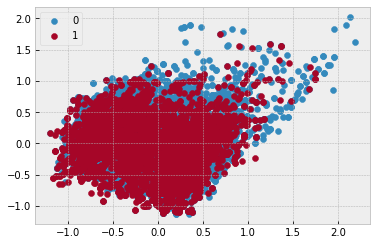

In [179]:
plotScatter(y_train, X_trainMCA.values)
## it can be seen that the demographic features are Overlapping which makes harder to predict 

Counter({0: 10255, 1: 4512})


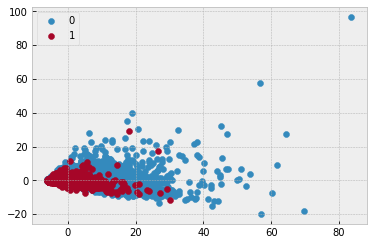

In [180]:
plotScatter(y_train, X_trainPCA.values)
## it can be seen that the pca= VLE and other numerical features are slightly overlapping --> not much like Demographic features. 

Counter({0: 10255, 1: 4512})


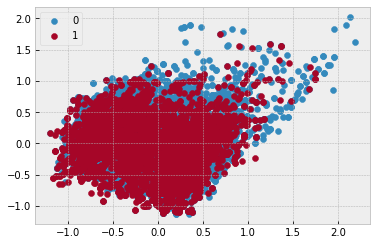

In [181]:
## The whole PCA & MCA data merged 
plotScatter(y_train, X_trainAll.values)

In [182]:
corr = X_trainAll.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.001622,0.000714,0.000563,0.000341,0.265336,0.006435,0.000929,-0.123099,-0.153076
1,-0.001622,1.000000,-0.001775,-0.001220,0.001416,-0.056778,0.082823,-0.074870,0.067055,0.105754
2,0.000714,-0.001775,1.000000,-0.000641,-0.000877,0.058691,-0.036711,0.043990,-0.067508,0.006314
3,0.000563,-0.001220,-0.000641,1.000000,-0.002543,0.068958,0.005797,0.134784,0.002256,0.010164
4,0.000341,0.001416,-0.000877,-0.002543,1.000000,0.151893,-0.068145,0.150276,-0.025745,-0.030648
5,0.265336,-0.056778,0.058691,0.068958,0.151893,1.000000,-0.000001,0.000002,-0.000000,-0.000004
6,0.006435,0.082823,-0.036711,0.005797,-0.068145,-0.000001,1.000000,-0.000937,-0.000176,0.000873
7,0.000929,-0.074870,0.043990,0.134784,0.150276,0.000002,-0.000937,1.000000,-0.000378,-0.002316
8,-0.123099,0.067055,-0.067508,0.002256,-0.025745,-0.000000,-0.000176,-0.000378,1.000000,-0.000241
9,-0.153076,0.105754,0.006314,0.010164,-0.030648,-0.000004,0.000873,-0.002316,-0.000241,1.000000


In [0]:
## Balancing Techniques
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
## cross validation & evaluation
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score
from numpy import mean
from sklearn.metrics import roc_curve, roc_auc_score


## ML algorithms
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

n_estimators = 10


In [184]:
from sklearn.utils.class_weight import compute_class_weight
compute_class_weight('balanced', np.unique(y_train), y_train)

array([0.71999025, 1.63641401])

In [0]:

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234),  
               BaggingClassifier(SVC(kernel='linear', probability=True), max_samples=1.0 / n_estimators, n_estimators=n_estimators),
               RandomForestClassifier(random_state=1234), 
               XGBClassifier( random_state = 1234)
               ]

class_weights2 = {0:0.71999, 1:1.6364}
#from sklearn.utils.class_weight import compute_class_weight
#class_weights2 = compute_class_weight('balanced', np.unique(y_train), y_train)
# Instantiate the classfiers and make a list
classifiersWeights = [LogisticRegression(random_state=1234, class_weight=class_weights2),  
               BaggingClassifier(SVC(kernel='linear', probability=True, class_weight=class_weights2), max_samples=1.0 / n_estimators, n_estimators=n_estimators),
               RandomForestClassifier(random_state=1234, class_weight=class_weights2), 
               XGBClassifier( random_state = 1234, class_weight=class_weights2)
               ]

SamplingTechniquee = [
                      TomekLinks( ratio='majority'),
                      SMOTE(ratio='minority', random_state=1234),
                      RandomUnderSampler(random_state=1234, sampling_strategy='majority'),
                      RandomOverSampler(random_state=53)
                      ]

# Define a result table as a DataFrame
result_table= pd.DataFrame(columns=['SamplingTechnique','classifiers', 'FPR','TPR', 'FPR_forModel','TPR_forModel','ROC_AUC','Mean ROC_AUC', 'F1Score', 'recall', 'precision'])
result_tablePCA = pd.DataFrame(columns=['SamplingTechnique','classifiers', 'FPR','TPR', 'FPR_forModel','TPR_forModel','ROC_AUC','Mean ROC_AUC', 'F1Score', 'recall', 'precision'])


In [0]:
result_tableMCA = pd.DataFrame(columns=['SamplingTechnique','classifiers', 'FPR','TPR', 'FPR_forModel','TPR_forModel','ROC_AUC','Mean ROC_AUC', 'F1Score', 'recall', 'precision'])


In [0]:
#/***************************************************************************************
#*    Title: Drawing multiple ROC-Curves in a single plot
#*    Author: Abdullah Al Imran
#*    Date: June 01, 2019
#*    Availability: https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
#*
#***************************************************************************************/

def plottingROC_Curve(title, balancingTech):
  fig = plt.figure(figsize=(10,8))
  print(balancingTech)
  for i in result_table.index:
    if (result_table.SamplingTechnique[i] == balancingTech ):
      plt.plot(result_table.loc[i]['FPR'], 
             result_table.loc[i]['TPR'],
             label="{}, AUC={:.3f}".format(result_table.loc[i]['classifiers'], result_table.loc[i]['ROC_AUC']))
  plt.plot([0,1], [0,1], color='orange',  marker='.')
  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("Flase Positive Rate", fontsize=15)
  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("True Positive Rate", fontsize=15)
  plt.title(title+ balancingTech, fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')
  plt.show()

In [0]:
#/***************************************************************************************
#*    Title: Drawing multiple ROC-Curves in a single plot
#*    Author: Abdullah Al Imran
#*    Date: June 01, 2019
#*    Availability: https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
#*
#***************************************************************************************/

def plottingROC_CurvePCA(title, balancingTech):
  fig = plt.figure(figsize=(10,8))
  print(balancingTech)
  for i in result_tablePCA.index:
    if (result_tablePCA.SamplingTechnique[i] == balancingTech ):
      plt.plot(result_tablePCA.loc[i]['FPR'], 
             result_tablePCA.loc[i]['TPR'],
             label="{}, AUC={:.3f}".format(result_tablePCA.loc[i]['classifiers'], result_tablePCA.loc[i]['ROC_AUC']))
  plt.plot([0,1], [0,1], color='orange',  marker='.')
  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("Flase Positive Rate", fontsize=15)
  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("True Positive Rate", fontsize=15)
  plt.title(title+ balancingTech, fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')
  plt.show()

In [0]:
#/***************************************************************************************
#*    Title: Drawing multiple ROC-Curves in a single plot
#*    Author: Abdullah Al Imran
#*    Date: June 01, 2019
#*    Availability: https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
#*
#***************************************************************************************/

def plottingROC_CurveMCA(title, balancingTech):
  fig = plt.figure(figsize=(10,8))
  print(balancingTech)
  for i in result_tableMCA.index:
    if (result_tableMCA.SamplingTechnique[i] == balancingTech ):
      plt.plot(result_tableMCA.loc[i]['FPR'], 
             result_tableMCA.loc[i]['TPR'],
             label="{}, AUC={:.3f}".format(result_tableMCA.loc[i]['classifiers'], result_tableMCA.loc[i]['ROC_AUC']))
  plt.plot([0,1], [0,1], color='orange',  marker='.')
  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("Flase Positive Rate", fontsize=15)
  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("True Positive Rate", fontsize=15)
  plt.title(title+ balancingTech, fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')
  plt.show()

#### Using All data

##### Balancing techniques

TomekLinks
LogisticRegression
Mean ROC AUC: 0.867
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4396
           1       0.74      0.66      0.69      1934

    accuracy                           0.82      6330
   macro avg       0.80      0.78      0.78      6330
weighted avg       0.82      0.82      0.82      6330

TomekLinks
BaggingClassifier
Mean ROC AUC: 0.870
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4396
           1       0.75      0.67      0.71      1934

    accuracy                           0.83      6330
   macro avg       0.81      0.79      0.80      6330
weighted avg       0.83      0.83      0.83      6330

TomekLinks
RandomForestClassifier
Mean ROC AUC: 0.882
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4396
           1       0.84      0.64      0.73      1934

    accuracy                 

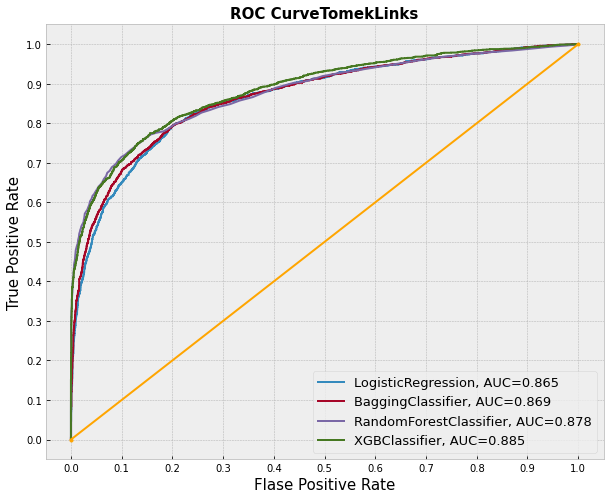

SMOTE


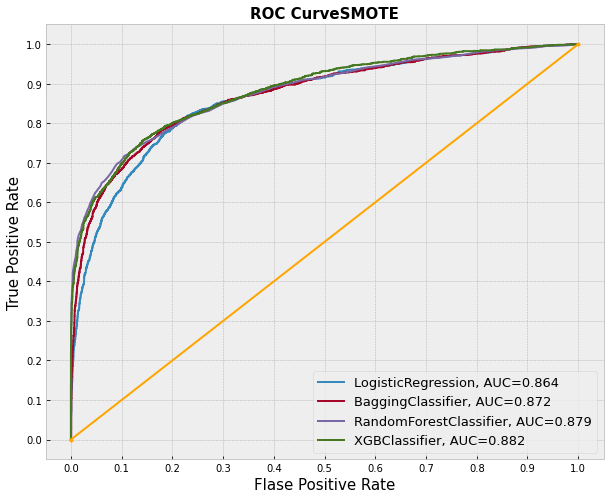

RandomUnderSampler


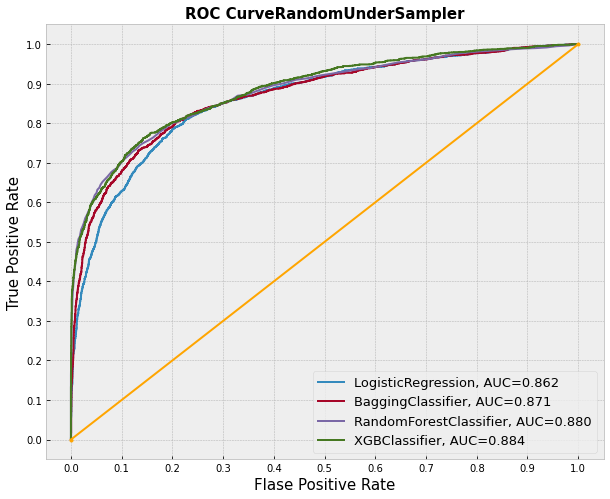

RandomOverSampler


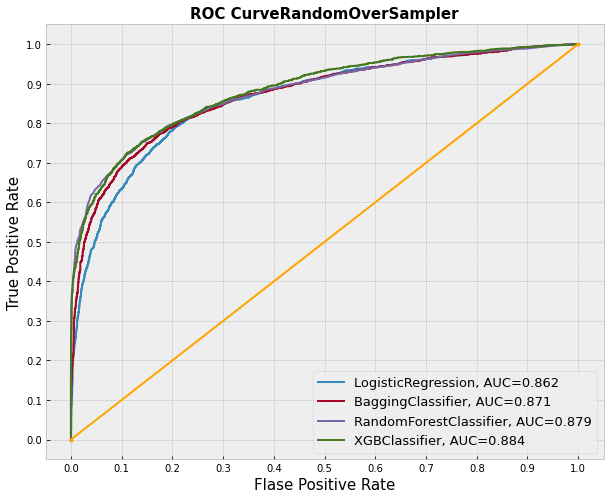

In [231]:
#/***************************************************************************************
### NOT all below code is from that site ####
#*    Title: Drawing multiple ROC-Curves in a single plot
#*    Author: Abdullah Al Imran
#*    Date: June 01, 2019
#*    Availability: https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
#*
#***************************************************************************************/

# Train the models and record the results
for samplingTech in SamplingTechniquee:
  for cl in classifiers:
    print(samplingTech.__class__.__name__)
    print(cl.__class__.__name__)
    steps = [('sampling', samplingTech), ('model',  cl)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    scores = cross_val_score(pipeline, X_trainAll.values, y_train, scoring='roc_auc', cv=kfold, n_jobs=-1)
    #print(cl)
    print('Mean ROC AUC: %.3f' % mean(scores))
    ## Model
    model = pipeline.fit(X_trainAll.values, y_train)
    y_pred = model.predict(X_testAll.values)
    ## AUC Curve 
    y_pred_proba = model.predict_proba(X_testAll.values)[::, 1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    ## other values for model
    #fprModel, tprModel, threshold = roc_curve(y_test,  y_pred)
    cm = confusion_matrix(y_test, y_pred)
    # tprModel = float(cm[0][0])/np.sum(cm[0])
    tnrModel = float(cm[1][1])/np.sum(cm[1])
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    tprModel = tp/(tp+fn)
    fprModel = 1-(tn/(tn+fp))
    f1Score =  f1_score(y_test, y_pred, average='binary')
    recallScore = recall_score(y_test, y_pred, average='binary')
    precisionScore = precision_score(y_test, y_pred, average='binary')
    print(classification_report(y_test, y_pred))
    result_table = result_table.append({'SamplingTechnique': samplingTech.__class__.__name__, 
                                       'classifiers':cl.__class__.__name__,
                                       'FPR':fpr,  'TPR':tpr,  'FPR_forModel': fprModel ,'TPR_forModel': tprModel ,
                                       'ROC_AUC':auc,
                                       'Mean ROC_AUC':(mean(scores)),
                                       'F1Score': f1Score, 'recall':recallScore, 
                                       'precision':precisionScore}, ignore_index=True)


for samplingTech in SamplingTechniquee:
  plottingROC_Curve('ROC Curve',samplingTech.__class__.__name__)


LogisticRegression
Mean ROC AUC: 0.867
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4396
           1       0.77      0.61      0.68      1934

    accuracy                           0.83      6330
   macro avg       0.81      0.77      0.78      6330
weighted avg       0.82      0.83      0.82      6330

BaggingClassifier
Mean ROC AUC: 0.869
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4396
           1       0.78      0.64      0.70      1934

    accuracy                           0.83      6330
   macro avg       0.82      0.78      0.79      6330
weighted avg       0.83      0.83      0.83      6330

RandomForestClassifier
Mean ROC AUC: 0.881
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4396
           1       0.86      0.62      0.72      1934

    accuracy                           0.85      6330
   macro

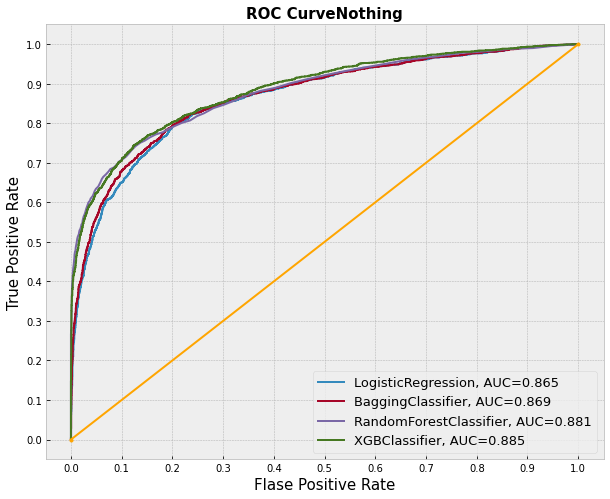

In [232]:
#/***************************************************************************************
### NOT all below code is from that site ####
#*    Title: Drawing multiple ROC-Curves in a single plot
#*    Author: Abdullah Al Imran
#*    Date: June 01, 2019
#*    Availability: https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
#*
#***************************************************************************************/

# Train the models and record the results
for cl in classifiers:
  steps = [ ('model',  cl)]
  pipeline = Pipeline(steps=steps)
  # evaluate pipeline
  scores = cross_val_score(pipeline, X_trainAll.values, y_train, scoring='roc_auc', cv=kfold, n_jobs=-1)
  print(cl.__class__.__name__)
  print('Mean ROC AUC: %.3f' % mean(scores))
    ## Model
  model = pipeline.fit(X_trainAll.values, y_train)
  y_pred = model.predict(X_testAll.values)
  ## AUC Curve 
  y_pred_proba = model.predict_proba(X_testAll.values)[::, 1]
  fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
  auc = roc_auc_score(y_test, y_pred_proba)

  ## other values for model
  cm = confusion_matrix(y_test, y_pred)
  # tprModel = float(cm[0][0])/np.sum(cm[0])
  tnrModel = float(cm[1][1])/np.sum(cm[1])
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]
  tprModel = tp/(tp+fn)
  fprModel = 1-(tn/(tn+fp))
  f1Score =  f1_score(y_test, y_pred, average='binary')
  recallScore = recall_score(y_test, y_pred, average='binary')
  precisionScore = precision_score(y_test, y_pred, average='binary')
  print(classification_report(y_test, y_pred))
  result_table = result_table.append({'SamplingTechnique': 'Nothing', 
                                       'classifiers':cl.__class__.__name__,
                                       'FPR':fpr,  'TPR':tpr,  'FPR_forModel': fprModel ,'TPR_forModel': tprModel , 'ROC_AUC':auc,
                                       'Mean ROC_AUC':(mean(scores)),
                                       'F1Score': f1Score, 'recall':recallScore, 
                                       'precision':precisionScore}, ignore_index=True)


plottingROC_Curve('ROC Curve','Nothing')

In [216]:

#/***************************************************************************************
#* Most of the code is from the listed site
#*    Title:Your First Deep Learning Project in Python with Keras Step-By-Step
#*    Author: Jason Brownlee
#*    Date:  July 24, 2019
#*    Availability: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
#*
#***************************************************************************************/

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import class_weight

# define the keras model
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

for sampling in SamplingTechniquee: 
  print(sampling.__class__.__name__)
  X_sampled, y_sampled = sampling.fit_sample(X_trainAll, y_train) 
  #print(np.bincount(y_rus1)) ## how many records we have now

  # compile the keras model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit the keras model on the dataset
  model.fit(X_sampled, y_sampled, validation_data=(X_testAll, y_test),batch_size=30,  epochs=500, verbose=0)

  # predict probabilities for test set
  yhat_probs = model.predict(X_testAll, verbose=0)
  # predict crisp classes for test set
  yhat_classes = model.predict_classes(X_testAll, verbose=0)
  # reduce to 1d array
  yhat_probs = yhat_probs[:, 0]
  yhat_classes = yhat_classes[:, 0]
 
  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, yhat_classes)
  print('Accuracy: %f' % accuracy)
  # precision tp / (tp + fp)
  precision = precision_score(y_test, yhat_classes)
  print('Precision: %f' % precision)
  # recall: tp / (tp + fn)
  recall = recall_score(y_test, yhat_classes)
  print('Recall: %f' % recall)
  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, yhat_classes)
  print('F1 score: %f' % f1)
  # ROC AUC
  auc = roc_auc_score(y_test, yhat_probs)
  print('ROC AUC: %f' % auc)
  # confusion matrix
  #matrix = confusion_matrix(y_test, yhat_classes)
  #print(matrix)
  print(classification_report(y_test, yhat_classes))


TomekLinks
Accuracy: 0.842022
Precision: 0.776659
Recall: 0.677870
F1 score: 0.723909
ROC AUC: 0.875910
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4396
           1       0.78      0.68      0.72      1934

    accuracy                           0.84      6330
   macro avg       0.82      0.80      0.81      6330
weighted avg       0.84      0.84      0.84      6330

SMOTE
Accuracy: 0.824013
Precision: 0.710041
Recall: 0.716649
F1 score: 0.713330
ROC AUC: 0.865410
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4396
           1       0.71      0.72      0.71      1934

    accuracy                           0.82      6330
   macro avg       0.79      0.79      0.79      6330
weighted avg       0.82      0.82      0.82      6330

RandomUnderSampler
Accuracy: 0.809163
Precision: 0.672365
Recall: 0.732161
F1 score: 0.700990
ROC AUC: 0.860643
              precision    reca

##### Class weights

LogisticRegression
Mean ROC AUC: 0.863
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      4396
           1       0.56      0.85      0.67      1934

    accuracy                           0.75      6330
   macro avg       0.74      0.78      0.74      6330
weighted avg       0.81      0.75      0.76      6330

BaggingClassifier
Mean ROC AUC: 0.873
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4396
           1       0.81      0.64      0.71      1934

    accuracy                           0.84      6330
   macro avg       0.83      0.79      0.80      6330
weighted avg       0.84      0.84      0.84      6330

RandomForestClassifier
Mean ROC AUC: 0.882
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4396
           1       0.87      0.61      0.72      1934

    accuracy                           0.85      6330
   macro

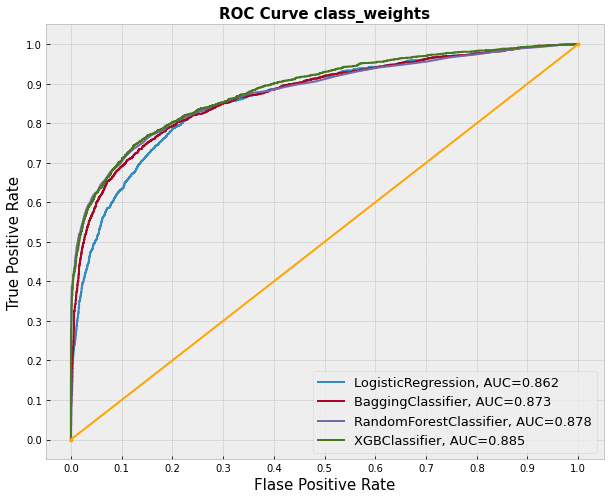

In [233]:
#/***************************************************************************************
### NOT all below code is from that site ####
#*    Title: Drawing multiple ROC-Curves in a single plot
#*    Author: Abdullah Al Imran
#*    Date: June 01, 2019
#*    Availability: https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
#*
#***************************************************************************************/
# Train the models and record the results
for cl in classifiersWeights:
  steps = [ ('model',  cl)]
  pipeline = Pipeline(steps=steps)
  # evaluate pipeline
  scores = cross_val_score(pipeline, X_trainAll.values, y_train, scoring='roc_auc', cv=kfold, n_jobs=-1)
  print(cl.__class__.__name__)
  print('Mean ROC AUC: %.3f' % mean(scores))
    ## Model
  model = pipeline.fit(X_trainAll.values, y_train)
  y_pred = model.predict(X_testAll.values)
    ## AUC Curve 
  y_pred_proba = model.predict_proba(X_testAll.values)[::, 1]
  fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
  auc = roc_auc_score(y_test, y_pred_proba)

  ## other values for model
  cm = confusion_matrix(y_test, y_pred)
  # tprModel = float(cm[0][0])/np.sum(cm[0])
  tnrModel = float(cm[1][1])/np.sum(cm[1])
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]
  tprModel = tp/(tp+fn)
  fprModel = 1-(tn/(tn+fp))
  f1Score =  f1_score(y_test, y_pred, average='binary')
  recallScore = recall_score(y_test, y_pred, average='binary')
  precisionScore = precision_score(y_test, y_pred, average='binary')
  print(classification_report(y_test, y_pred))
  result_table = result_table.append({'SamplingTechnique': 'class_weights', 
                                       'classifiers':cl.__class__.__name__,
                                       'FPR':fpr,  'TPR':tpr,  'FPR_forModel': fprModel ,'TPR_forModel': tprModel , 'ROC_AUC':auc,
                                       'Mean ROC_AUC':(mean(scores)),
                                       'F1Score': f1Score, 'recall':recallScore, 
                                       'precision':precisionScore}, ignore_index=True)

plottingROC_Curve('ROC Curve ','class_weights')

In [217]:

#/***************************************************************************************
#* Most of the code is from the listed site
#*    Title:Your First Deep Learning Project in Python with Keras Step-By-Step
#*    Author: Jason Brownlee
#*    Date:  July 24, 2019
#*    Availability: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
#*
#***************************************************************************************/

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import class_weight

# define the keras model
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
#class_weights = class_weight = {0:1,1:5}

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_trainAll, y_train, validation_data=(X_testAll, y_test),batch_size=30,  epochs=500, verbose=0, class_weight= class_weights)

# predict probabilities for test set
yhat_probs = model.predict(X_testAll, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_testAll, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)


print(classification_report(y_test, yhat_classes))

Accuracy: 0.853397
Precision: 0.837131
Recall: 0.645812
F1 score: 0.729130
Cohens kappa: 0.630911
ROC AUC: 0.873094
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4396
           1       0.84      0.65      0.73      1934

    accuracy                           0.85      6330
   macro avg       0.85      0.80      0.81      6330
weighted avg       0.85      0.85      0.85      6330



#### Using PCA data

##### Balancing techniques

TomekLinks
LogisticRegression
Mean ROC AUC: 0.869
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4396
           1       0.71      0.72      0.72      1934

    accuracy                           0.83      6330
   macro avg       0.80      0.80      0.80      6330
weighted avg       0.83      0.83      0.83      6330

TomekLinks
BaggingClassifier
Mean ROC AUC: 0.870
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4396
           1       0.73      0.71      0.72      1934

    accuracy                           0.83      6330
   macro avg       0.80      0.80      0.80      6330
weighted avg       0.83      0.83      0.83      6330

TomekLinks
RandomForestClassifier
Mean ROC AUC: 0.870
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4396
           1       0.80      0.66      0.72      1934

    accuracy                 

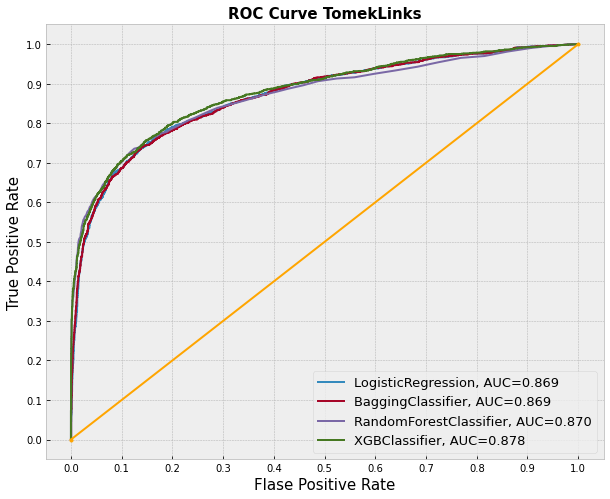

SMOTE


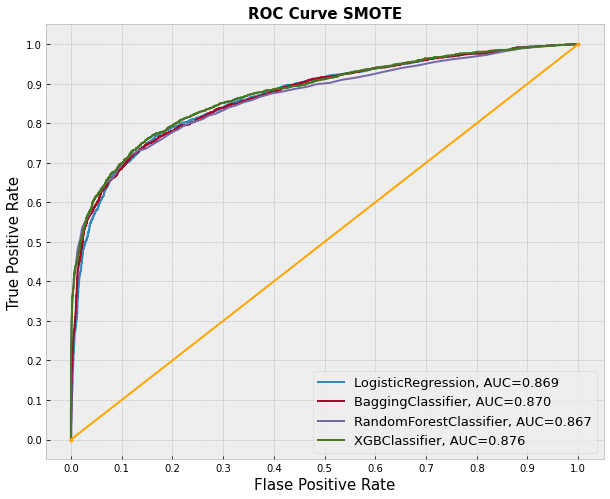

RandomUnderSampler


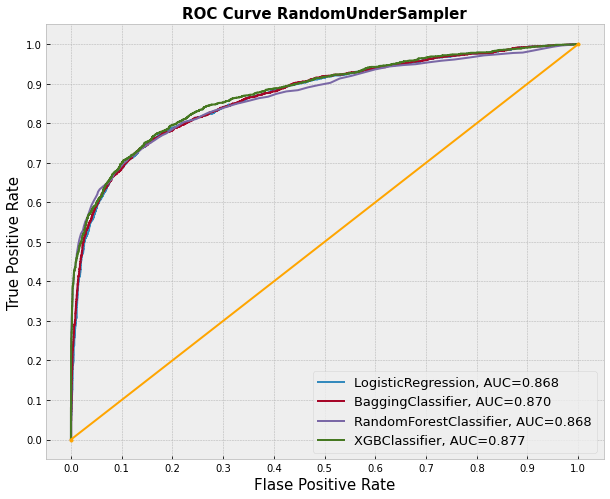

RandomOverSampler


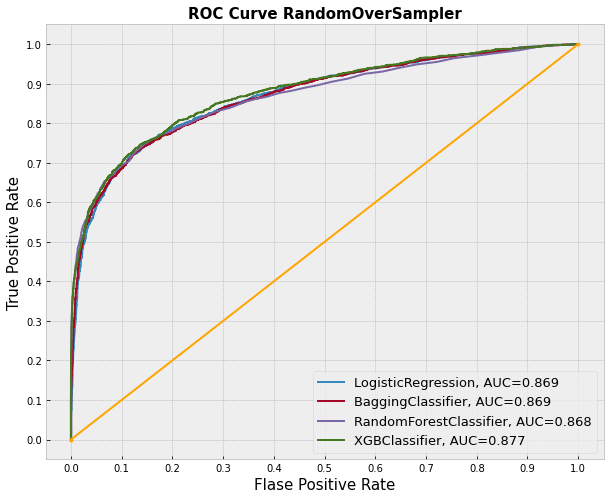

In [234]:
#/***************************************************************************************
### NOT all below code is from that site ####
#*    Title: Drawing multiple ROC-Curves in a single plot
#*    Author: Abdullah Al Imran
#*    Date: June 01, 2019
#*    Availability: https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
#*
#***************************************************************************************/
# Train the models and record the results
for samplingTech in SamplingTechniquee:
  for cl in classifiers:
    print(samplingTech.__class__.__name__)
    print(cl.__class__.__name__)
    steps = [('sampling', samplingTech), ('model',  cl)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    scores = cross_val_score(pipeline, X_trainPCA.values, y_train, scoring='roc_auc', cv=kfold, n_jobs=-1)
    #print(cl)
    print('Mean ROC AUC: %.3f' % mean(scores))
    ## Model
    model = pipeline.fit(X_trainPCA.values, y_train)
    y_pred = model.predict(X_testPCA.values)
    ## AUC Curve 
    y_pred_proba = model.predict_proba(X_testPCA.values)[::, 1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    ## other values for model
    #fprModel, tprModel, threshold = roc_curve(y_test,  y_pred)
    cm = confusion_matrix(y_test, y_pred)
    # tprModel = float(cm[0][0])/np.sum(cm[0])
    tnrModel = float(cm[1][1])/np.sum(cm[1])
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    tprModel = tp/(tp+fn)
    fprModel = 1-(tn/(tn+fp))
    f1Score =  f1_score(y_test, y_pred, average='binary')
    recallScore = recall_score(y_test, y_pred, average='binary')
    precisionScore = precision_score(y_test, y_pred, average='binary')
    print(classification_report(y_test, y_pred))
    result_tablePCA = result_tablePCA.append({'SamplingTechnique': samplingTech.__class__.__name__, 
                                       'classifiers':cl.__class__.__name__,
                                       'FPR':fpr,  'TPR':tpr,  'FPR_forModel': fprModel ,'TPR_forModel': tprModel ,
                                       'ROC_AUC':auc,
                                       'Mean ROC_AUC':(mean(scores)),
                                       'F1Score': f1Score, 'recall':recallScore, 
                                       'precision':precisionScore}, ignore_index=True)


for samplingTech in SamplingTechniquee:
  plottingROC_CurvePCA('ROC Curve ',samplingTech.__class__.__name__)


LogisticRegression
Mean ROC AUC: 0.869
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4396
           1       0.77      0.67      0.72      1934

    accuracy                           0.84      6330
   macro avg       0.82      0.79      0.80      6330
weighted avg       0.84      0.84      0.84      6330

BaggingClassifier
Mean ROC AUC: 0.870
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4396
           1       0.80      0.64      0.71      1934

    accuracy                           0.84      6330
   macro avg       0.83      0.79      0.80      6330
weighted avg       0.84      0.84      0.84      6330

RandomForestClassifier
Mean ROC AUC: 0.871
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      4396
           1       0.84      0.63      0.72      1934

    accuracy                           0.85      6330
   macro

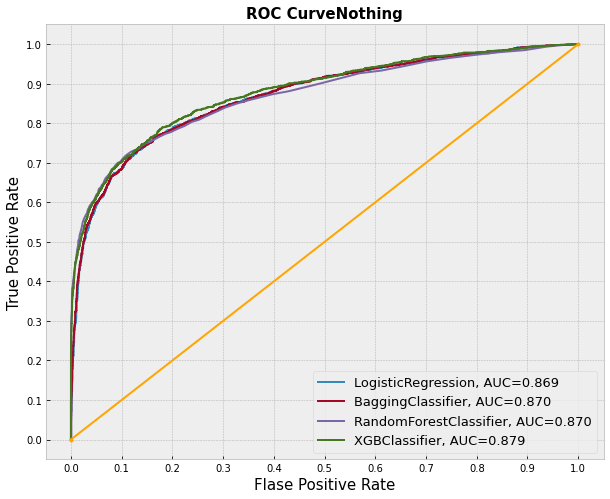

In [235]:
#/***************************************************************************************
### NOT all below code is from that site ####
#*    Title: Drawing multiple ROC-Curves in a single plot
#*    Author: Abdullah Al Imran
#*    Date: June 01, 2019
#*    Availability: https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
#*
#***************************************************************************************/
#
# Train the models and record the results
for cl in classifiers:
  steps = [ ('model',  cl)]
  pipeline = Pipeline(steps=steps)
  # evaluate pipeline
  scores = cross_val_score(pipeline, X_trainPCA.values, y_train, scoring='roc_auc', cv=kfold, n_jobs=-1)
  print(cl.__class__.__name__)
  print('Mean ROC AUC: %.3f' % mean(scores))
    ## Model
  model = pipeline.fit(X_trainPCA.values, y_train)
  y_pred = model.predict(X_testPCA.values)
  ## AUC Curve 
  y_pred_proba = model.predict_proba(X_testPCA.values)[::, 1]
  fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
  auc = roc_auc_score(y_test, y_pred_proba)

  ## other values for model
  cm = confusion_matrix(y_test, y_pred)
  # tprModel = float(cm[0][0])/np.sum(cm[0])
  tnrModel = float(cm[1][1])/np.sum(cm[1])
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]
  tprModel = tp/(tp+fn)
  fprModel = 1-(tn/(tn+fp))
  f1Score =  f1_score(y_test, y_pred, average='binary')
  recallScore = recall_score(y_test, y_pred, average='binary')
  precisionScore = precision_score(y_test, y_pred, average='binary')
  print(classification_report(y_test, y_pred))
  result_tablePCA = result_tablePCA.append({'SamplingTechnique': 'Nothing', 
                                       'classifiers':cl.__class__.__name__,
                                       'FPR':fpr,  'TPR':tpr,  'FPR_forModel': fprModel ,'TPR_forModel': tprModel , 'ROC_AUC':auc,
                                       'Mean ROC_AUC':(mean(scores)),
                                       'F1Score': f1Score, 'recall':recallScore, 
                                       'precision':precisionScore}, ignore_index=True)


plottingROC_CurvePCA('ROC Curve','Nothing')

In [215]:

#/***************************************************************************************
#* Most of the code is from the listed site
#*    Title:Your First Deep Learning Project in Python with Keras Step-By-Step
#*    Author: Jason Brownlee
#*    Date:  July 24, 2019
#*    Availability: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
#*
#***************************************************************************************/

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import class_weight

# define the keras model
model = Sequential()
#model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(5, input_dim=5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(15, activation='relu'))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

for sampling in SamplingTechniquee: 
  print(sampling.__class__.__name__)
  X_sampled, y_sampled = sampling.fit_sample(X_trainPCA, y_train) 
  #print(np.bincount(y_rus1)) ## how many records we have now

  # compile the keras model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit the keras model on the dataset
  model.fit(X_sampled, y_sampled, validation_data=(X_testPCA, y_test),batch_size=30,  epochs=500, verbose=0 )

  # predict probabilities for test set
  yhat_probs = model.predict(X_testPCA, verbose=0)
  # predict crisp classes for test set
  yhat_classes = model.predict_classes(X_testPCA, verbose=0)
  # reduce to 1d array
  yhat_probs = yhat_probs[:, 0]
  yhat_classes = yhat_classes[:, 0]
 
  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, yhat_classes)
  print('Accuracy: %f' % accuracy)
  # precision tp / (tp + fp)
  precision = precision_score(y_test, yhat_classes)
  print('Precision: %f' % precision)
  # recall: tp / (tp + fn)
  recall = recall_score(y_test, yhat_classes)
  print('Recall: %f' % recall)
  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, yhat_classes)
  print('F1 score: %f' % f1)
  # ROC AUC
  auc = roc_auc_score(y_test, yhat_probs)
  print('ROC AUC: %f' % auc)
  # confusion matrix
  #matrix = confusion_matrix(y_test, yhat_classes)
  #print(matrix)
  print(classification_report(y_test, yhat_classes))

TomekLinks
Accuracy: 0.860032
Precision: 0.842037
Recall: 0.667011
F1 score: 0.744374
ROC AUC: 0.881453
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4396
           1       0.84      0.67      0.74      1934

    accuracy                           0.86      6330
   macro avg       0.85      0.81      0.82      6330
weighted avg       0.86      0.86      0.85      6330

SMOTE
Accuracy: 0.835229
Precision: 0.733613
Recall: 0.723371
F1 score: 0.728456
ROC AUC: 0.873698
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4396
           1       0.73      0.72      0.73      1934

    accuracy                           0.84      6330
   macro avg       0.81      0.80      0.81      6330
weighted avg       0.83      0.84      0.83      6330

RandomUnderSampler
Accuracy: 0.825592
Precision: 0.708543
Recall: 0.729059
F1 score: 0.718654
ROC AUC: 0.871359
              precision    reca

##### Class weights

LogisticRegression
Mean ROC AUC: 0.869
              precision    recall  f1-score   support

           0       0.91      0.66      0.77      4396
           1       0.53      0.85      0.65      1934

    accuracy                           0.72      6330
   macro avg       0.72      0.76      0.71      6330
weighted avg       0.79      0.72      0.73      6330

BaggingClassifier
Mean ROC AUC: 0.870
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4396
           1       0.77      0.67      0.72      1934

    accuracy                           0.84      6330
   macro avg       0.82      0.79      0.80      6330
weighted avg       0.83      0.84      0.83      6330

RandomForestClassifier
Mean ROC AUC: 0.869
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4396
           1       0.84      0.62      0.71      1934

    accuracy                           0.85      6330
   macro

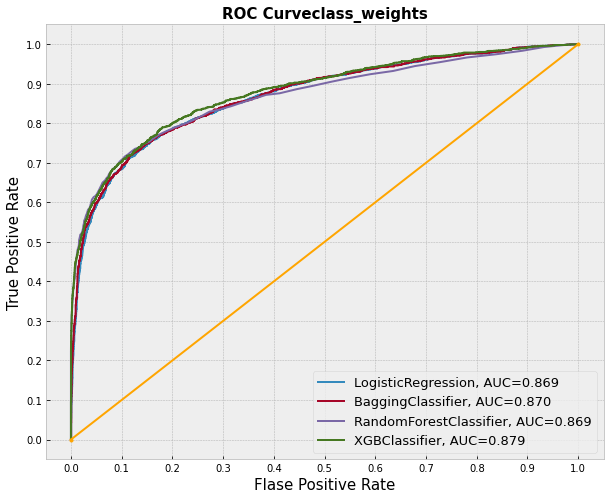

In [236]:
#/***************************************************************************************
### NOT all below code is from that site ####
#*    Title: Drawing multiple ROC-Curves in a single plot
#*    Author: Abdullah Al Imran
#*    Date: June 01, 2019
#*    Availability: https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
#*
#***************************************************************************************/
# Train the models and record the results
for cl in classifiersWeights:
  steps = [ ('model',  cl)]
  pipeline = Pipeline(steps=steps)
  # evaluate pipeline
  scores = cross_val_score(pipeline, X_trainPCA.values, y_train, scoring='roc_auc', cv=kfold, n_jobs=-1)
  print(cl.__class__.__name__)
  print('Mean ROC AUC: %.3f' % mean(scores))
    ## Model
  model = pipeline.fit(X_trainPCA.values, y_train)
  y_pred = model.predict(X_testPCA.values)
    ## AUC Curve 
  y_pred_proba = model.predict_proba(X_testPCA.values)[::, 1]
  fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
  auc = roc_auc_score(y_test, y_pred_proba)

  ## other values for model
  cm = confusion_matrix(y_test, y_pred)
  # tprModel = float(cm[0][0])/np.sum(cm[0])
  tnrModel = float(cm[1][1])/np.sum(cm[1])
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]
  tprModel = tp/(tp+fn)
  fprModel = 1-(tn/(tn+fp))
  f1Score =  f1_score(y_test, y_pred, average='binary')
  recallScore = recall_score(y_test, y_pred, average='binary')
  precisionScore = precision_score(y_test, y_pred, average='binary')
  print(classification_report(y_test, y_pred))
  result_tablePCA = result_tablePCA.append({'SamplingTechnique': 'class_weights', 
                                       'classifiers':cl.__class__.__name__,
                                       'FPR':fpr,  'TPR':tpr,  'FPR_forModel': fprModel ,'TPR_forModel': tprModel , 'ROC_AUC':auc,
                                       'Mean ROC_AUC':(mean(scores)),
                                       'F1Score': f1Score, 'recall':recallScore, 
                                       'precision':precisionScore}, ignore_index=True)


plottingROC_CurvePCA('ROC Curve','class_weights')

In [212]:

#/***************************************************************************************
#* Most of the code is from the listed site
#*    Title:Your First Deep Learning Project in Python with Keras Step-By-Step
#*    Author: Jason Brownlee
#*    Date:  July 24, 2019
#*    Availability: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
#*
#***************************************************************************************/

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import class_weight

# define the keras model
model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(15, activation='relu'))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
#class_weights = class_weight = {0:1,1:5}

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_trainPCA, y_train, validation_data=(X_testPCA, y_test),batch_size=30,  epochs=500, verbose=0, class_weight= class_weights)

# predict probabilities for test set
yhat_probs = model.predict(X_testPCA, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_testPCA, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
#matrix = confusion_matrix(y_test, yhat_classes)
#print(matrix)

print(classification_report(y_test, yhat_classes))

Accuracy: 0.852765
Precision: 0.842681
Recall: 0.637022
F1 score: 0.725559
Cohens kappa: 0.627592
ROC AUC: 0.880783
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4396
           1       0.84      0.64      0.73      1934

    accuracy                           0.85      6330
   macro avg       0.85      0.79      0.81      6330
weighted avg       0.85      0.85      0.85      6330



#### Using MCA data

TomekLinks
LogisticRegression
Mean ROC AUC: 0.593
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      4396
           1       0.50      0.00      0.01      1934

    accuracy                           0.69      6330
   macro avg       0.60      0.50      0.41      6330
weighted avg       0.64      0.69      0.57      6330

TomekLinks
BaggingClassifier
Mean ROC AUC: 0.543
              precision    recall  f1-score   support

           0       0.69      1.00      0.82      4396
           1       0.00      0.00      0.00      1934

    accuracy                           0.69      6330
   macro avg       0.35      0.50      0.41      6330
weighted avg       0.48      0.69      0.57      6330

TomekLinks
RandomForestClassifier
Mean ROC AUC: 0.560
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      4396
           1       0.38      0.24      0.30      1934

    accuracy                 

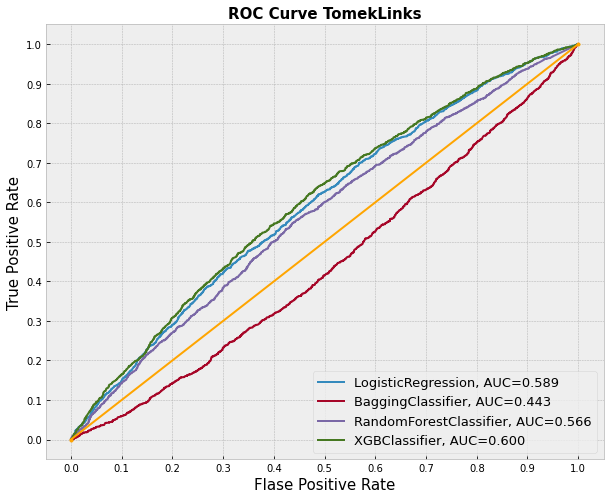

SMOTE


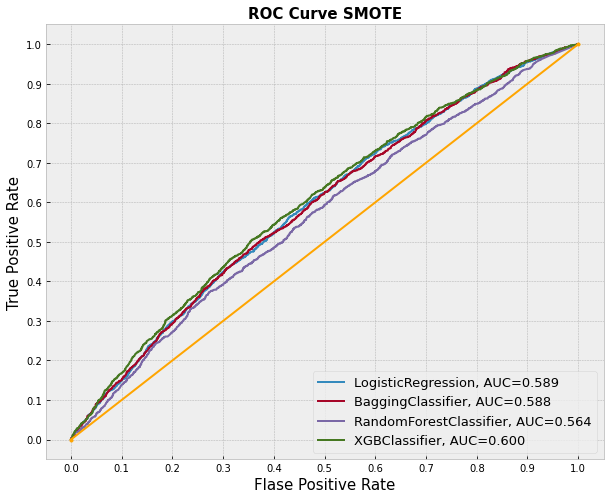

RandomUnderSampler


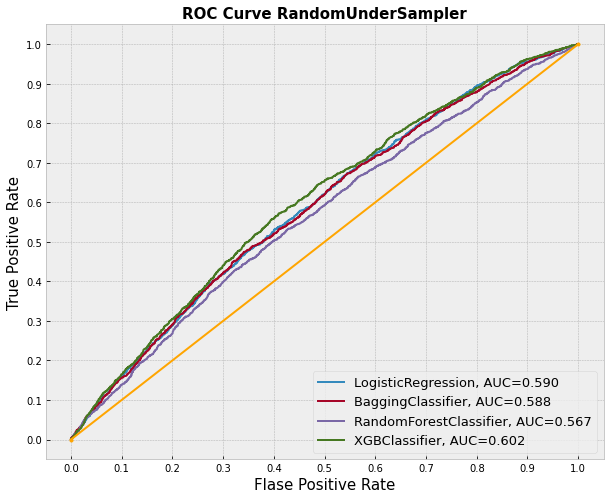

RandomOverSampler


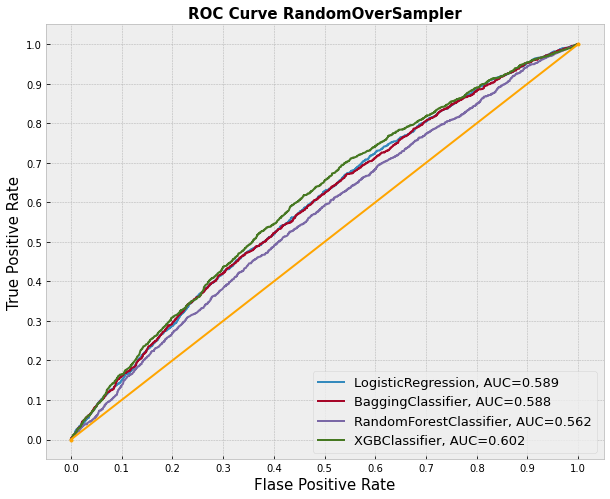

In [237]:
#/***************************************************************************************
### NOT all below code is from that site ####
#*    Title: Drawing multiple ROC-Curves in a single plot
#*    Author: Abdullah Al Imran
#*    Date: June 01, 2019
#*    Availability: https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
#*
#***************************************************************************************/

# Train the models and record the results
for samplingTech in SamplingTechniquee:
  for cl in classifiers:
    print(samplingTech.__class__.__name__)
    print(cl.__class__.__name__)
    steps = [('sampling', samplingTech), ('model',  cl)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    scores = cross_val_score(pipeline, X_trainMCA.values, y_train, scoring='roc_auc', cv=kfold, n_jobs=-1)
    #print(cl)
    print('Mean ROC AUC: %.3f' % mean(scores))
    ## Model
    model = pipeline.fit(X_trainMCA.values, y_train)
    y_pred = model.predict(X_testMCA.values)
    ## AUC Curve 
    y_pred_proba = model.predict_proba(X_testMCA.values)[::, 1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    ## other values for model
    #fprModel, tprModel, threshold = roc_curve(y_test,  y_pred)
    cm = confusion_matrix(y_test, y_pred)
    # tprModel = float(cm[0][0])/np.sum(cm[0])
    tnrModel = float(cm[1][1])/np.sum(cm[1])
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    tprModel = tp/(tp+fn)
    fprModel = 1-(tn/(tn+fp))
    f1Score =  f1_score(y_test, y_pred, average='binary')
    recallScore = recall_score(y_test, y_pred, average='binary')
    precisionScore = precision_score(y_test, y_pred, average='binary')
    print(classification_report(y_test, y_pred))
    result_tableMCA = result_tableMCA.append({'SamplingTechnique': samplingTech.__class__.__name__, 
                                       'classifiers':cl.__class__.__name__,
                                       'FPR':fpr,  'TPR':tpr,  'FPR_forModel': fprModel ,'TPR_forModel': tprModel ,
                                       'ROC_AUC':auc,
                                       'Mean ROC_AUC':(mean(scores)),
                                       'F1Score': f1Score, 'recall':recallScore, 
                                       'precision':precisionScore}, ignore_index=True)


for samplingTech in SamplingTechniquee:
  plottingROC_CurveMCA('ROC Curve ',samplingTech.__class__.__name__)



LogisticRegression
Mean ROC AUC: 0.593
              precision    recall  f1-score   support

           0       0.69      1.00      0.82      4396
           1       0.50      0.00      0.01      1934

    accuracy                           0.69      6330
   macro avg       0.60      0.50      0.41      6330
weighted avg       0.64      0.69      0.57      6330

BaggingClassifier
Mean ROC AUC: 0.544
              precision    recall  f1-score   support

           0       0.69      1.00      0.82      4396
           1       0.00      0.00      0.00      1934

    accuracy                           0.69      6330
   macro avg       0.35      0.50      0.41      6330
weighted avg       0.48      0.69      0.57      6330

RandomForestClassifier
Mean ROC AUC: 0.561
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      4396
           1       0.38      0.25      0.30      1934

    accuracy                           0.65      6330
   macro

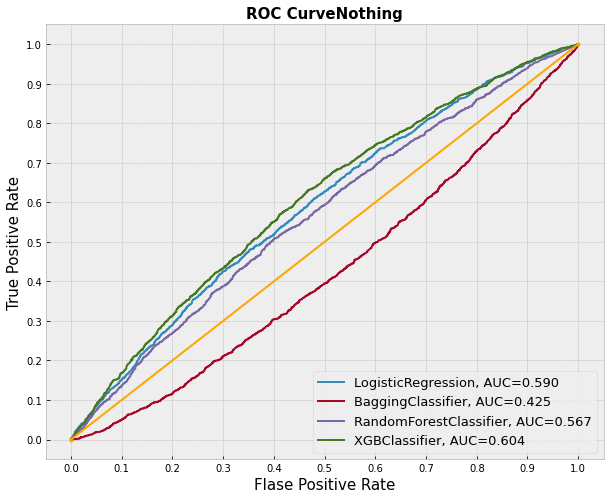

In [238]:
#/***************************************************************************************
### NOT all below code is from that site ####
#*    Title: Drawing multiple ROC-Curves in a single plot
#*    Author: Abdullah Al Imran
#*    Date: June 01, 2019
#*    Availability: https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
#*
#***************************************************************************************/
# Train the models and record the results
for cl in classifiers:
  steps = [ ('model',  cl)]
  pipeline = Pipeline(steps=steps)
  # evaluate pipeline
  scores = cross_val_score(pipeline, X_trainMCA.values, y_train, scoring='roc_auc', cv=kfold, n_jobs=-1)
  print(cl.__class__.__name__)
  print('Mean ROC AUC: %.3f' % mean(scores))
    ## Model
  model = pipeline.fit(X_trainMCA.values, y_train)
  y_pred = model.predict(X_testMCA.values)
  ## AUC Curve 
  y_pred_proba = model.predict_proba(X_testMCA.values)[::, 1]
  fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
  auc = roc_auc_score(y_test, y_pred_proba)

  ## other values for model
  cm = confusion_matrix(y_test, y_pred)
  # tprModel = float(cm[0][0])/np.sum(cm[0])
  tnrModel = float(cm[1][1])/np.sum(cm[1])
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]
  tprModel = tp/(tp+fn)
  fprModel = 1-(tn/(tn+fp))
  f1Score =  f1_score(y_test, y_pred, average='binary')
  recallScore = recall_score(y_test, y_pred, average='binary')
  precisionScore = precision_score(y_test, y_pred, average='binary')
  print(classification_report(y_test, y_pred))
  result_tableMCA = result_tableMCA.append({'SamplingTechnique': 'Nothing', 
                                       'classifiers':cl.__class__.__name__,
                                       'FPR':fpr,  'TPR':tpr,  'FPR_forModel': fprModel ,'TPR_forModel': tprModel , 'ROC_AUC':auc,
                                       'Mean ROC_AUC':(mean(scores)),
                                       'F1Score': f1Score, 'recall':recallScore, 
                                       'precision':precisionScore}, ignore_index=True)

plottingROC_CurveMCA('ROC Curve','Nothing')